In [81]:
library(tidyverse)

In [82]:
library(scatterplot3d)

In [83]:
library(DataExplorer)

In [84]:
library(DescTools)

In [85]:
options(repr.plot.width=19, repr.plot.height=12)

In [87]:
path <- ".."

In [88]:
xfun::in_dir(dir = path, expr = source("./src/calculate_mode.R"))

In [89]:

impute_outliers <- function(x, 
                            coefficient_iqr = 1.5, 
                            method = c("interpolate", "mode", "median", "mean")[1]){
  # x: vector of observations
  # method: indicates the method of outlier values imputation
  # coefficient_iqr: indicates the multiple of interquartile range from the box
  
  # create an empty output object
  output <- list()
  
  # create a boxplot object
  boxplot_object <- boxplot.stats(x, coef = coefficient_iqr)
  
  # extract the outlier values
  outlier_values <- boxplot_object$out
  
  # get the outlier positions
  outlier_positions <- which(x %in% outlier_values)
  
  # replace outlier values with NA
  imputed_data <- x
  imputed_data[outlier_positions] <- NA
  
  # impute outlier values
  if (method == "mean"){
    outlier_substitutes <- mean(imputed_data, na.rm = TRUE)
    imputed_data[outlier_positions] <- outlier_substitutes
  }
  else if (method == "median"){
    outlier_substitutes <- median(imputed_data, na.rm = TRUE)
    imputed_data[outlier_positions] <- outlier_substitutes
  }
  else if (method == "mode"){
    outlier_substitutes <- calculate_mode(x = na.omit(imputed_data),
                                          data_type = c("continuous", "discrete")[1])
    imputed_data[outlier_positions] <- outlier_substitutes
  }
  else if (method == "interpolate"){
    imputed_data <- as.numeric(forecast::na.interp(x = imputed_data))
    outlier_substitutes <- imputed_data[outlier_positions]
  }
  else{
    stop("Please enter appropriate information in the argument: method!")
  }
  
  # update the output object
  output[["outlier_values"]] <- outlier_values
  output[["outlier_positions"]] <- outlier_positions
  output[["outlier_substitutes"]] <- outlier_substitutes
  output[["method"]] <- method
  output[["coefficient_iqr"]] <- coefficient_iqr
  output[["imputed_data"]] <- imputed_data
  output[["raw_data"]] <- x
  
  output
}


In [90]:
source <- "./applications/final_dataset.csv"

In [91]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = source, sep = ","))

In [92]:
str(data)

'data.frame':	22847 obs. of  59 variables:
 $ timestamp             : int  17207386 17241310 17274219 17308103 17343083 17374951 17408808 17440764 17474667 17508571 ...
 $ latitude              : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num  2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude     : num  NA -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 ...
 $ velocity_longitude    : num  NA 9.48e-12 7.09e-12 6.72e-12 8.41e-12 ...
 $ velocity              : num  NA 5.00e-11 3.89e-11 3.79e-11 4.93e-11 ...
 $ lateral_error         : num  -0.589 -0.571 -0.566 -0.56 -0.592 ...
 $ longitudinal_error    : num  0.0639 0.0775 0.0832 0.0979 0.1043 ...
 $ haversine_error       : num  0.592 0.576 0.572 0.569 0.6 ...
 $ latitude_error        : num  4.91e-06 4.77e-06 4.73e-06 5.57e-06 4.96e-06 ...
 $ longitude_error       : num  -1.22e-07 1.33e-07 2.49e-07 3.92e-07 5.62e-07 ...
 $ heading_error         : num  1.94 1.95 1.97 2.15 2.08 ...
 $ lateral_error_abs     : num  0.589 0.571 0.566 0

In [93]:
coefficient_iqr <- 3

In [95]:
data_lateral_error_object <- impute_outliers(x = data$lateral_error, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = c("interpolate", "mode", "median", "mean")[1])

In [96]:
data_longitudinal_error_object <- impute_outliers(x = data$longitudinal_error, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = c("interpolate", "mode", "median", "mean")[1])

In [97]:
data_haversine_error_object <- impute_outliers(x = data$haversine_error, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = c("interpolate", "mode", "median", "mean")[1])

In [98]:
data_lateral_error_abs_object <- impute_outliers(x = data$lateral_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = c("interpolate", "mode", "median", "mean")[1])

In [99]:
data_longitudinal_error_abs_object <- impute_outliers(x = data$longitudinal_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = c("interpolate", "mode", "median", "mean")[1])

In [100]:
data_haversine_error_abs_object <- impute_outliers(x = data$haversine_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = c("interpolate", "mode", "median", "mean")[1])

In [101]:
data_latitude_error_object <- impute_outliers(x = data$latitude_error, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = c("interpolate", "mode", "median", "mean")[1])

In [102]:
data_longitude_error_object <- impute_outliers(x = data$longitude_error, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = c("interpolate", "mode", "median", "mean")[1])

In [103]:
data_heading_error_object <- impute_outliers(x = data$heading_error, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = c("interpolate", "mode", "median", "mean")[1])

In [104]:
data_latitude_error_abs_object <- impute_outliers(x = data$latitude_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = c("interpolate", "mode", "median", "mean")[1])

In [105]:
data_longitude_error_abs_object <- impute_outliers(x = data$longitude_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = c("interpolate", "mode", "median", "mean")[1])

In [106]:
data_heading_error_abs_object <- impute_outliers(x = data$heading_error_abs, 
                                             coefficient_iqr = coefficient_iqr, 
                                             method = c("interpolate", "mode", "median", "mean")[1])

In [122]:
print(names(data_lateral_error_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [123]:
print(data_lateral_error_object$outlier_positions)

  [1]  2344  2345  2346  2347  2348  2349  2350  2351  2352  2353  2354  2355
 [13]  2356  2357  2358  2359  2360  2361  2362  2363  2364  2365  2366  2367
 [25]  2368  2369  2370  2371  2372  2373  2374  2375  2376  2377  2378  2379
 [37]  2380  2381  2382  2383  2384  2385  2386  2387  2388  2389  2390  2391
 [49]  2392  2393  2394  2395  2396  2397  2398  2399  2400  2401  2402  2403
 [61]  2404  2405  2406  2407  2408  2409  2410  2411  2412  2413  2414  2415
 [73]  2416  2417  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820
 [85]  4821  4822  4823  4824  4825  4826  4827  4828  4829  4830  4831  4832
 [97]  4833  4834 13507 16571 16572 16573 16574 16575 16576 16577 16578 16579
[109] 16580 16581 16582 16583 16599 16600 16601 16602 16603 16604 16605 16606
[121] 16607 16608 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618
[133] 16619 16620 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630
[145] 16631 16632 16633 16634 16635 16636 16637 16638 16639 1664

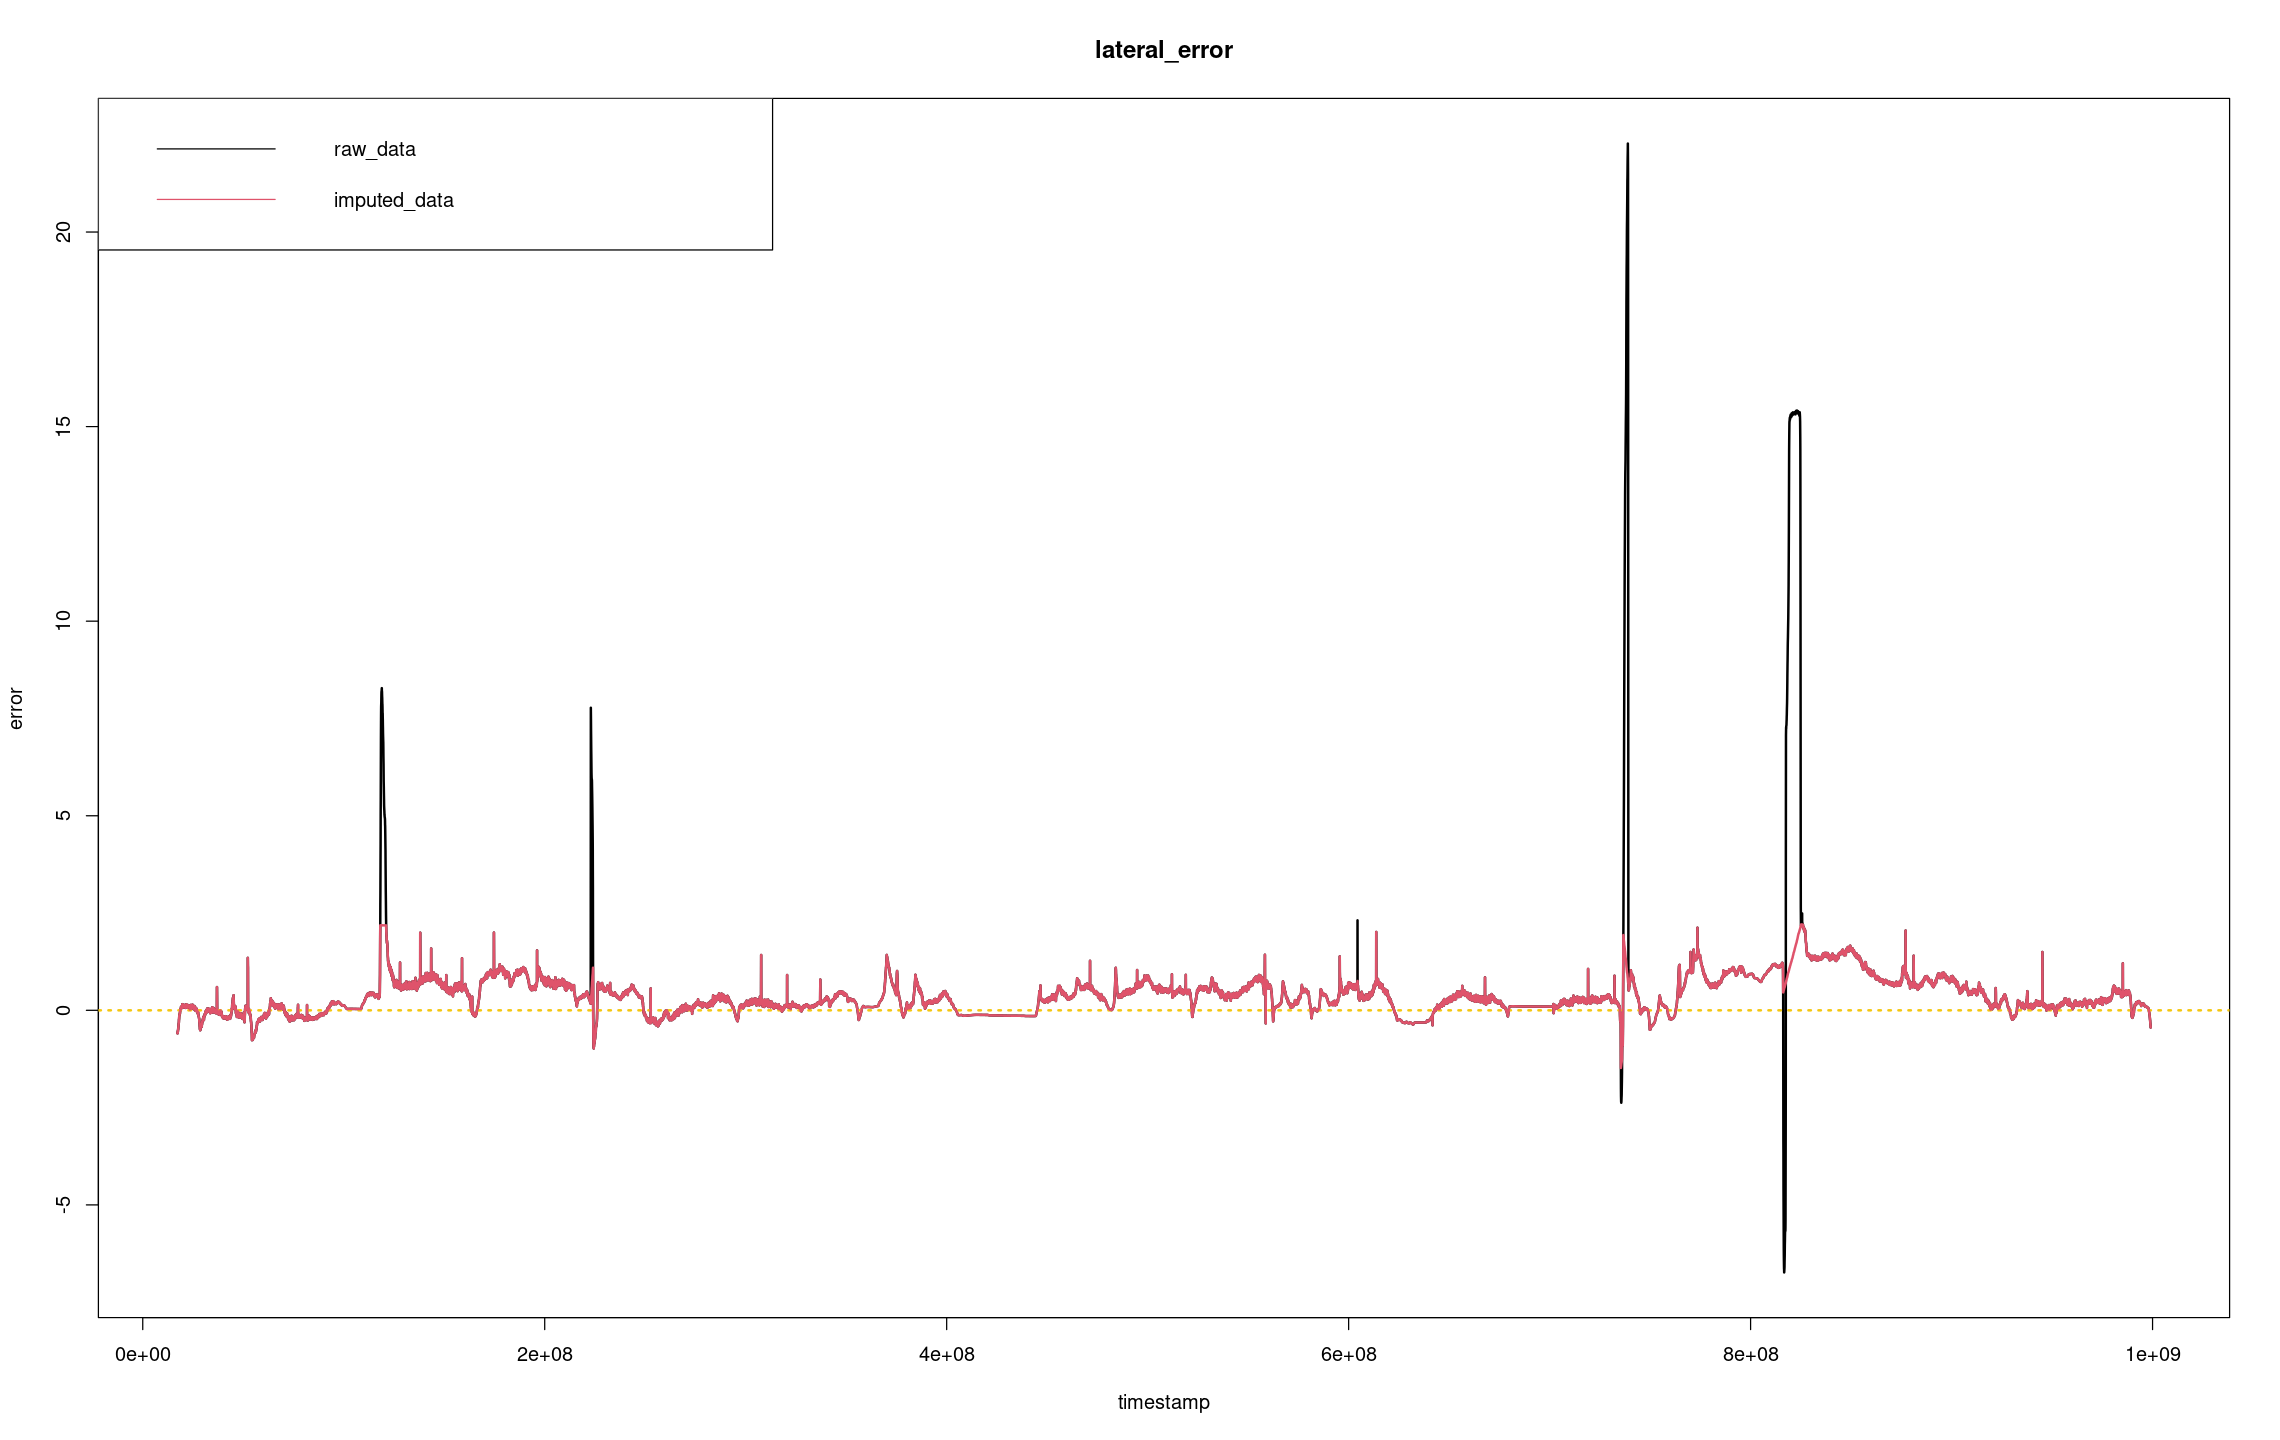

In [136]:
plot(x = data$timestamp, 
     y = data_lateral_error_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "error", 
     xlab = "timestamp",
    main = "lateral_error")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(data$timestamp, data_lateral_error_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

------------------------------------------------------------------------------ 
data_lateral_error_object$imputed_data (numeric)

       length            n         NAs      unique          0s        mean'
       22'847       22'847           0      22'583           0  0.37736415
                    100.0%        0.0%                    0.0%            
                                                                          
          .05          .10         .25      median         .75         .90
  -0.21281252  -0.13671891  0.09508434  0.30643409  0.62472773  0.93450800
                                                                          
        range           sd       vcoef         mad         IQR        skew
   3.69135046   0.44122243  1.16922189  0.38233638  0.52964339  0.85432101
                                                                          
      meanCI
  0.37164260
  0.38308571
            
         .95
  1.17453871
            
        kurt
  1.58089680
  

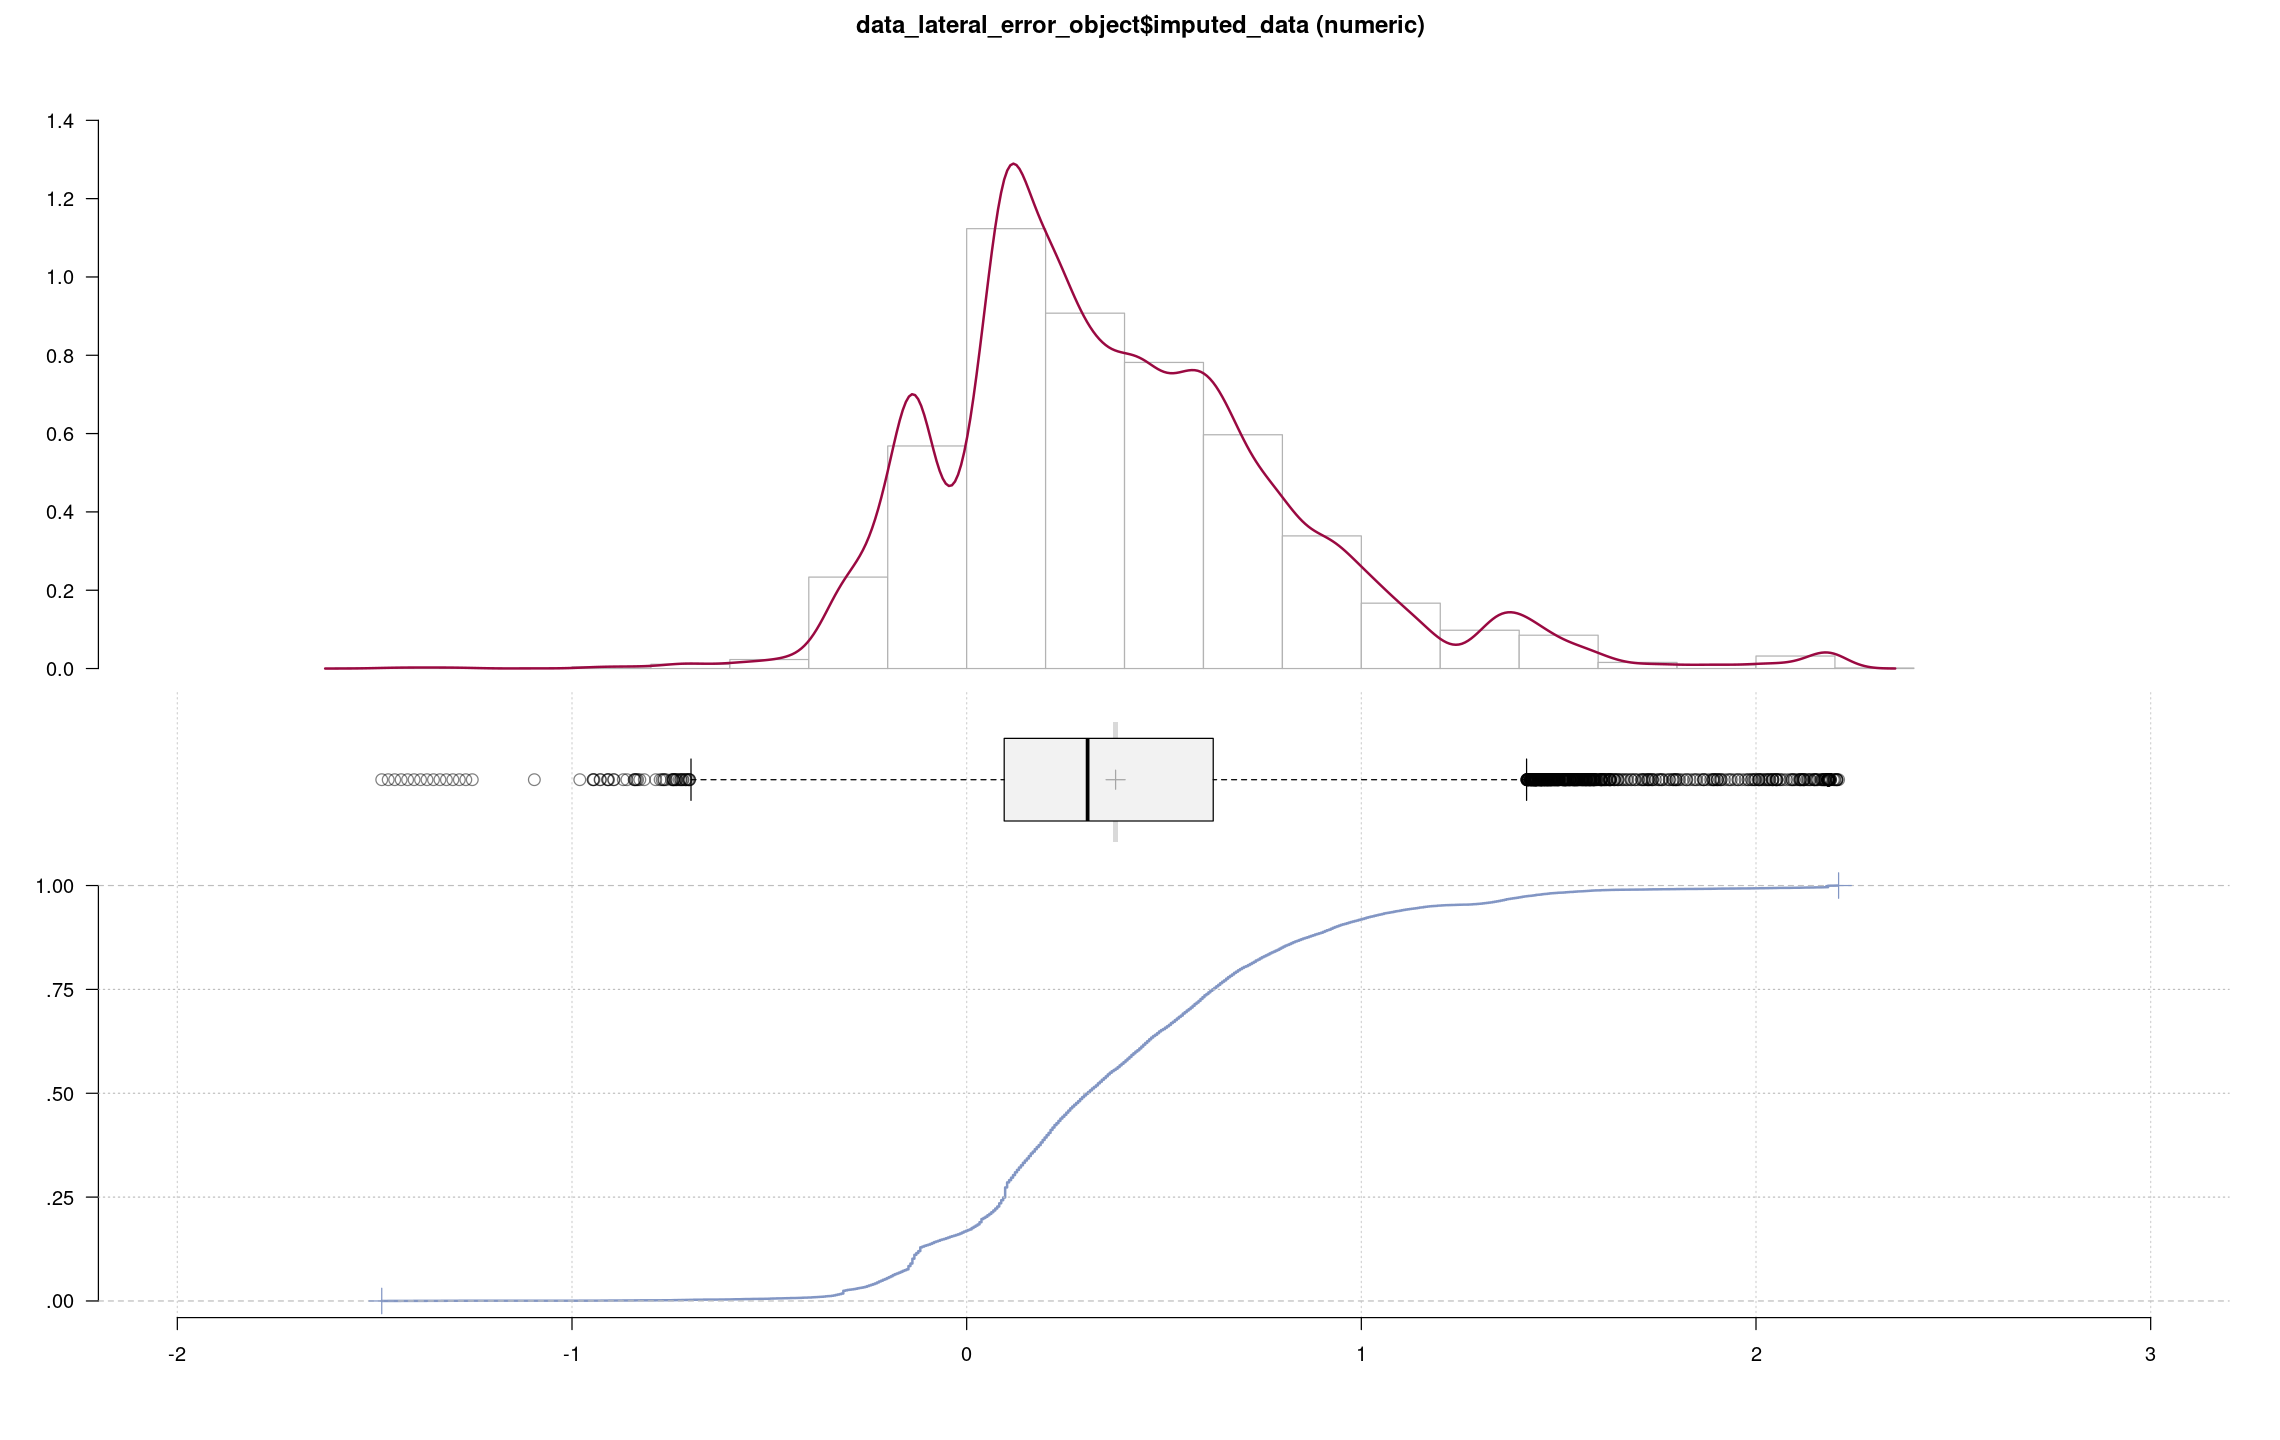

In [125]:
Desc(data_lateral_error_object$imputed_data)

In [109]:
data$lateral_error_imputed <- data_lateral_error_object$imputed_data

In [110]:
data$longitudinal_error_imputed <- data_longitudinal_error_object$imputed_data

In [111]:
data$haversine_error_imputed <- data_haversine_error_object$imputed_data

In [112]:
data$lateral_error_abs_imputed <- data_lateral_error_abs_object$imputed_data

In [113]:
data$longitudinal_error_abs_imputed <- data_longitudinal_error_abs_object$imputed_data

In [114]:
data$haversine_error_abs_imputed <- data_haversine_error_abs_object$imputed_data

In [115]:
data$latitude_error_imputed <- data_latitude_error_object$imputed_data

In [116]:
data$longitude_error_imputed <- data_longitude_error_object$imputed_data

In [117]:
data$heading_error_imputed <- data_heading_error_object$imputed_data

In [118]:
data$latitude_error_abs_imputed <- data_latitude_error_abs_object$imputed_data

In [119]:
data$longitude_error_abs_imputed <- data_longitude_error_abs_object$imputed_data

In [120]:
data$heading_error_abs_imputed <- data_heading_error_abs_object$imputed_data

In [121]:
print(names(data))

 [1] "timestamp"                      "latitude"                      
 [3] "longitude"                      "velocity_latitude"             
 [5] "velocity_longitude"             "velocity"                      
 [7] "lateral_error"                  "longitudinal_error"            
 [9] "haversine_error"                "latitude_error"                
[11] "longitude_error"                "heading_error"                 
[13] "lateral_error_abs"              "longitudinal_error_abs"        
[15] "haversine_error_abs"            "latitude_error_abs"            
[17] "longitude_error_abs"            "heading_error_abs"             
[19] "area"                           "object"                        
[21] "name_airplane"                  "name_bench"                    
[23] "name_bench..group."             "name_bicycle"                  
[25] "name_bird"                      "name_bird..group."             
[27] "name_boat"                      "name_bus"                      
[29] "

In [126]:
destination <- "./applications/final_imputed_dataset.csv"

In [127]:
xfun::in_dir(dir = path, expr = write.csv(x = data, file = destination, row.names = FALSE))

In [208]:
outlier_positions <- c(data_lateral_error_object$outlier_positions,
                      data_longitudinal_error_object$outlier_positions,
                      data_haversine_error_object$outlier_positions,
                      data_lateral_error_abs_object$outlier_positions,
                      data_longitudinal_error_abs_object$outlier_positions,
                      data_haversine_error_abs_object$outlier_positions,
                      data_latitude_error_object$outlier_positions,
                      data_longitude_error_object$outlier_positions,
                      data_heading_error_object$outlier_positions,
                      data_latitude_error_abs_object$outlier_positions,
                      data_longitude_error_abs_object$outlier_positions,
                      data_heading_error_abs_object$outlier_positions)

outlier_positions <- sort(unique(outlier_positions))

In [133]:
print(outlier_positions)

   [1]     1     2     3     4     5     6     7     8     9    10    11    12
  [13]    13    14    15    16    17    18    19    20    21    22   743   744
  [25]   745   746   747   748   749   750   751   752   753   754   755   756
  [37]   757   758   759   760   761   762   763   764   765   766   767   768
  [49]   769   770   771   772   773   774   775   776   777   778   779   780
  [61]   781   782   783   784   785   786   787  1845  1846  1847  1848  1849
  [73]  1850  1851  1852  1853  1854  1855  1856  1857  1858  1859  2264  2265
  [85]  2266  2267  2268  2269  2270  2271  2272  2273  2274  2275  2276  2277
  [97]  2278  2279  2280  2281  2282  2283  2284  2285  2286  2287  2288  2289
 [109]  2290  2291  2292  2293  2294  2295  2296  2297  2298  2299  2300  2301
 [121]  2302  2303  2304  2305  2306  2307  2308  2309  2310  2311  2312  2313
 [133]  2314  2315  2316  2317  2318  2319  2320  2321  2322  2323  2324  2325
 [145]  2326  2327  2328  2329  2330  2331  2332  23

In [210]:
data_bis <- data %>% select(c(timestamp, latitude, longitude, velocity_latitude, velocity_longitude, velocity, area, object, 
                              lateral_error_imputed, longitudinal_error_imputed, haversine_error_imputed, 
                              latitude_error_imputed, longitude_error_imputed, heading_error_imputed))

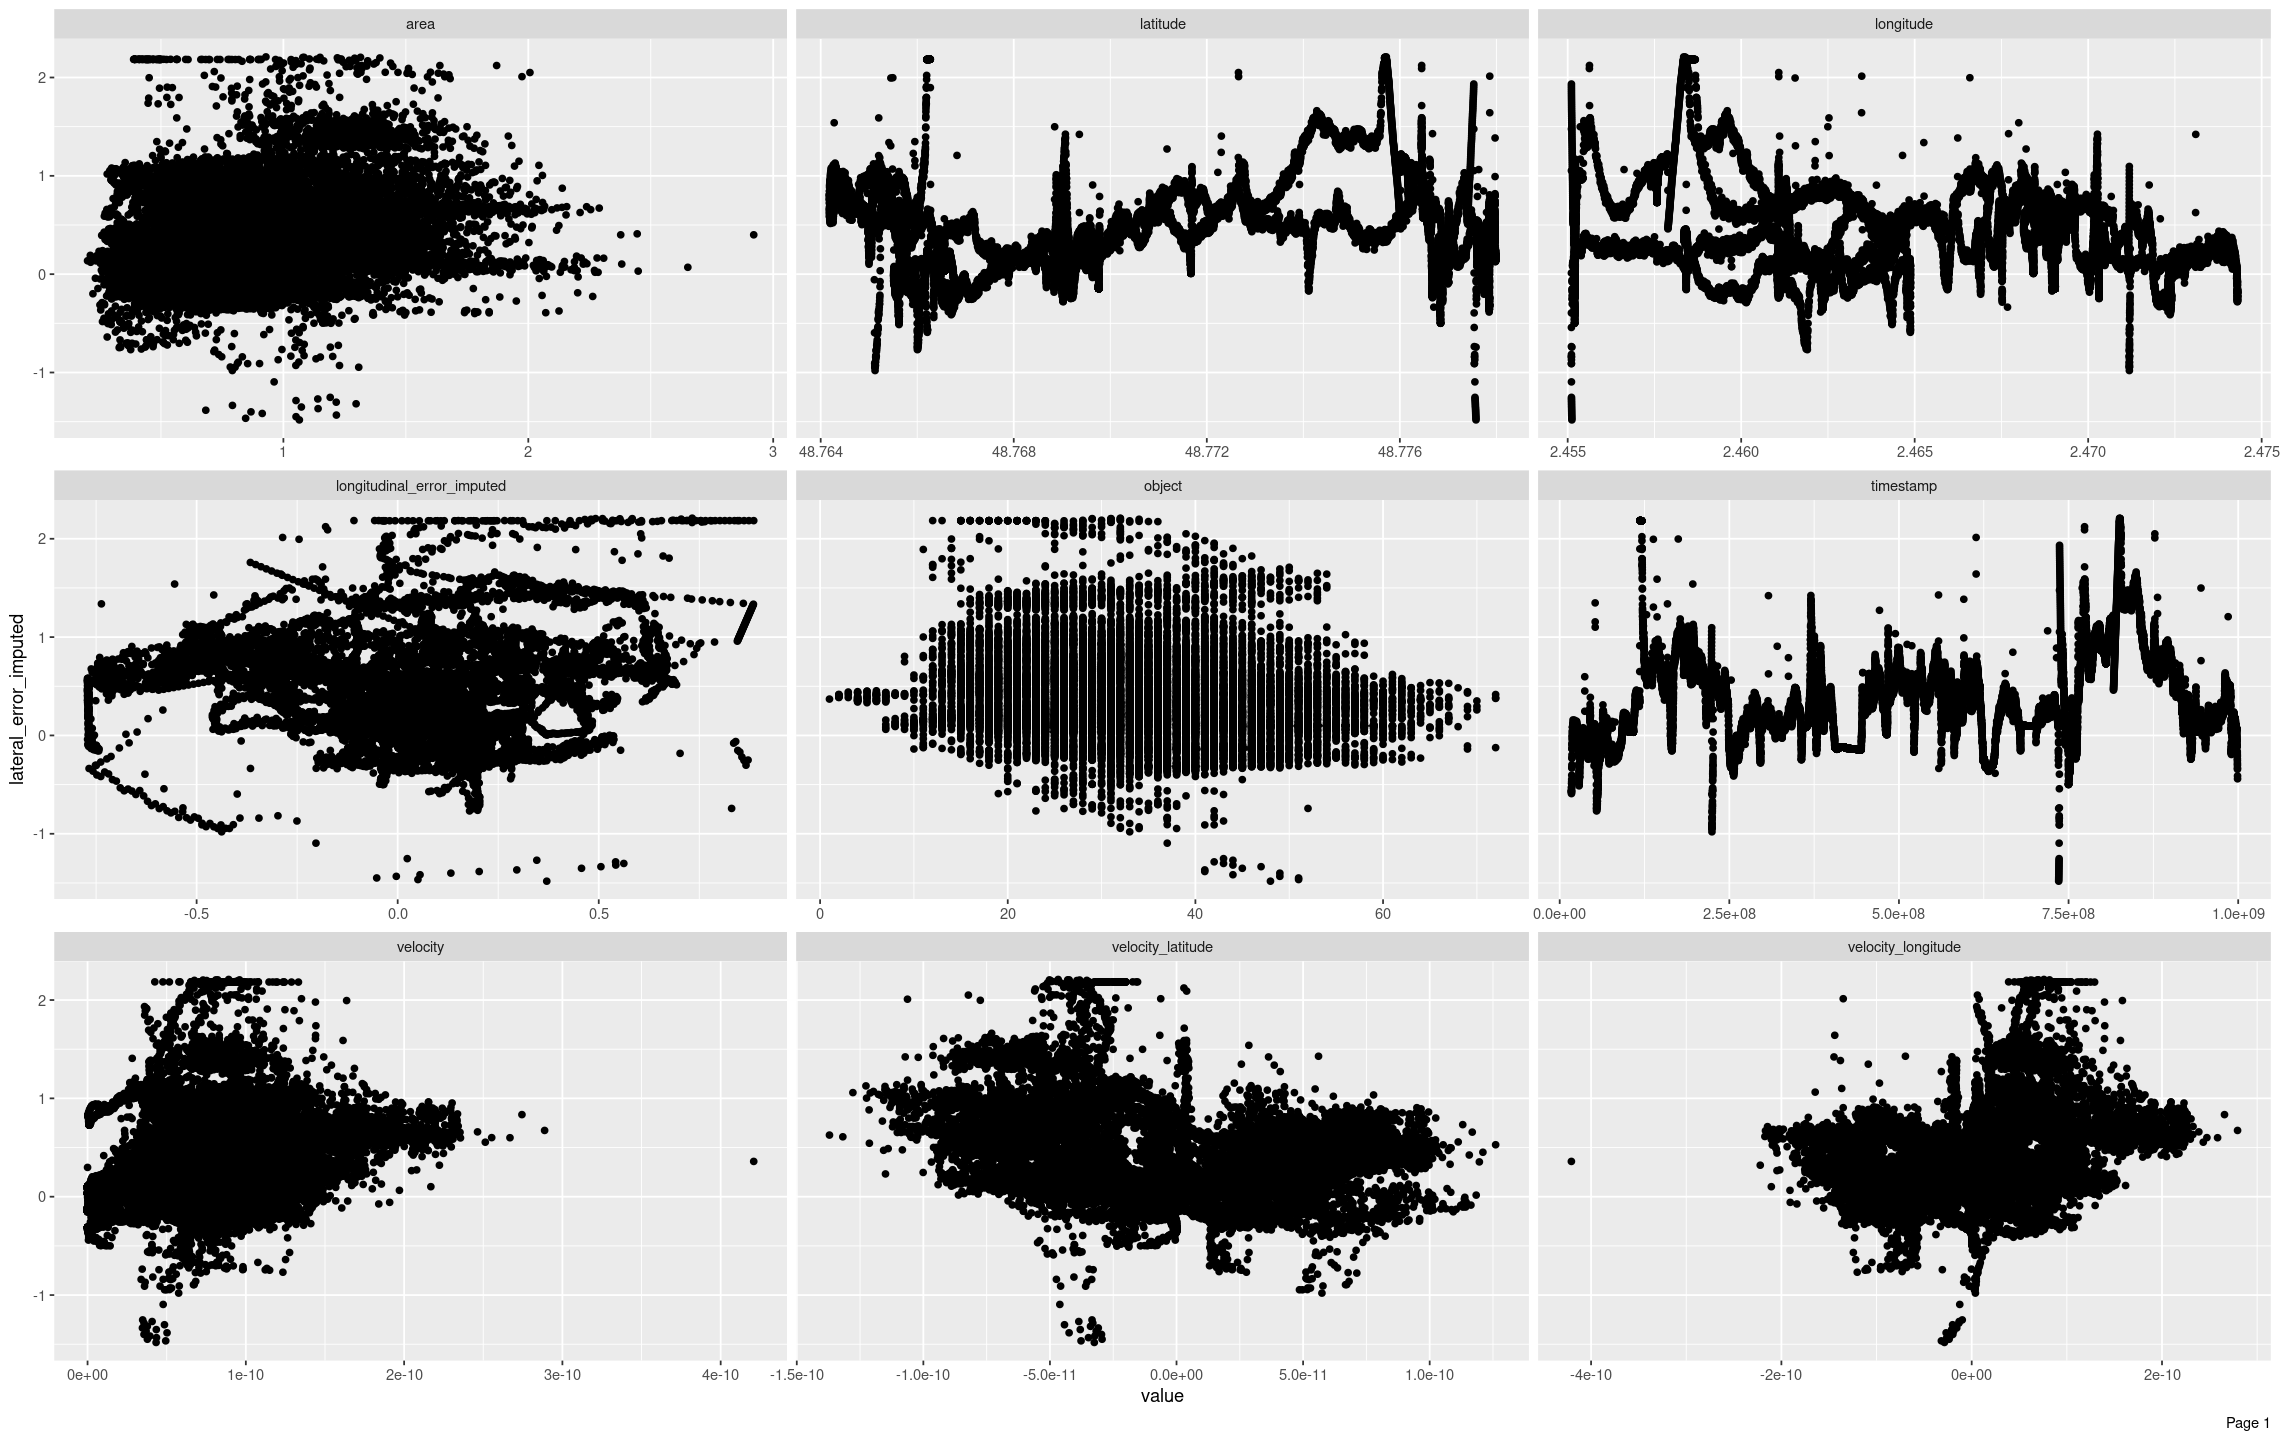

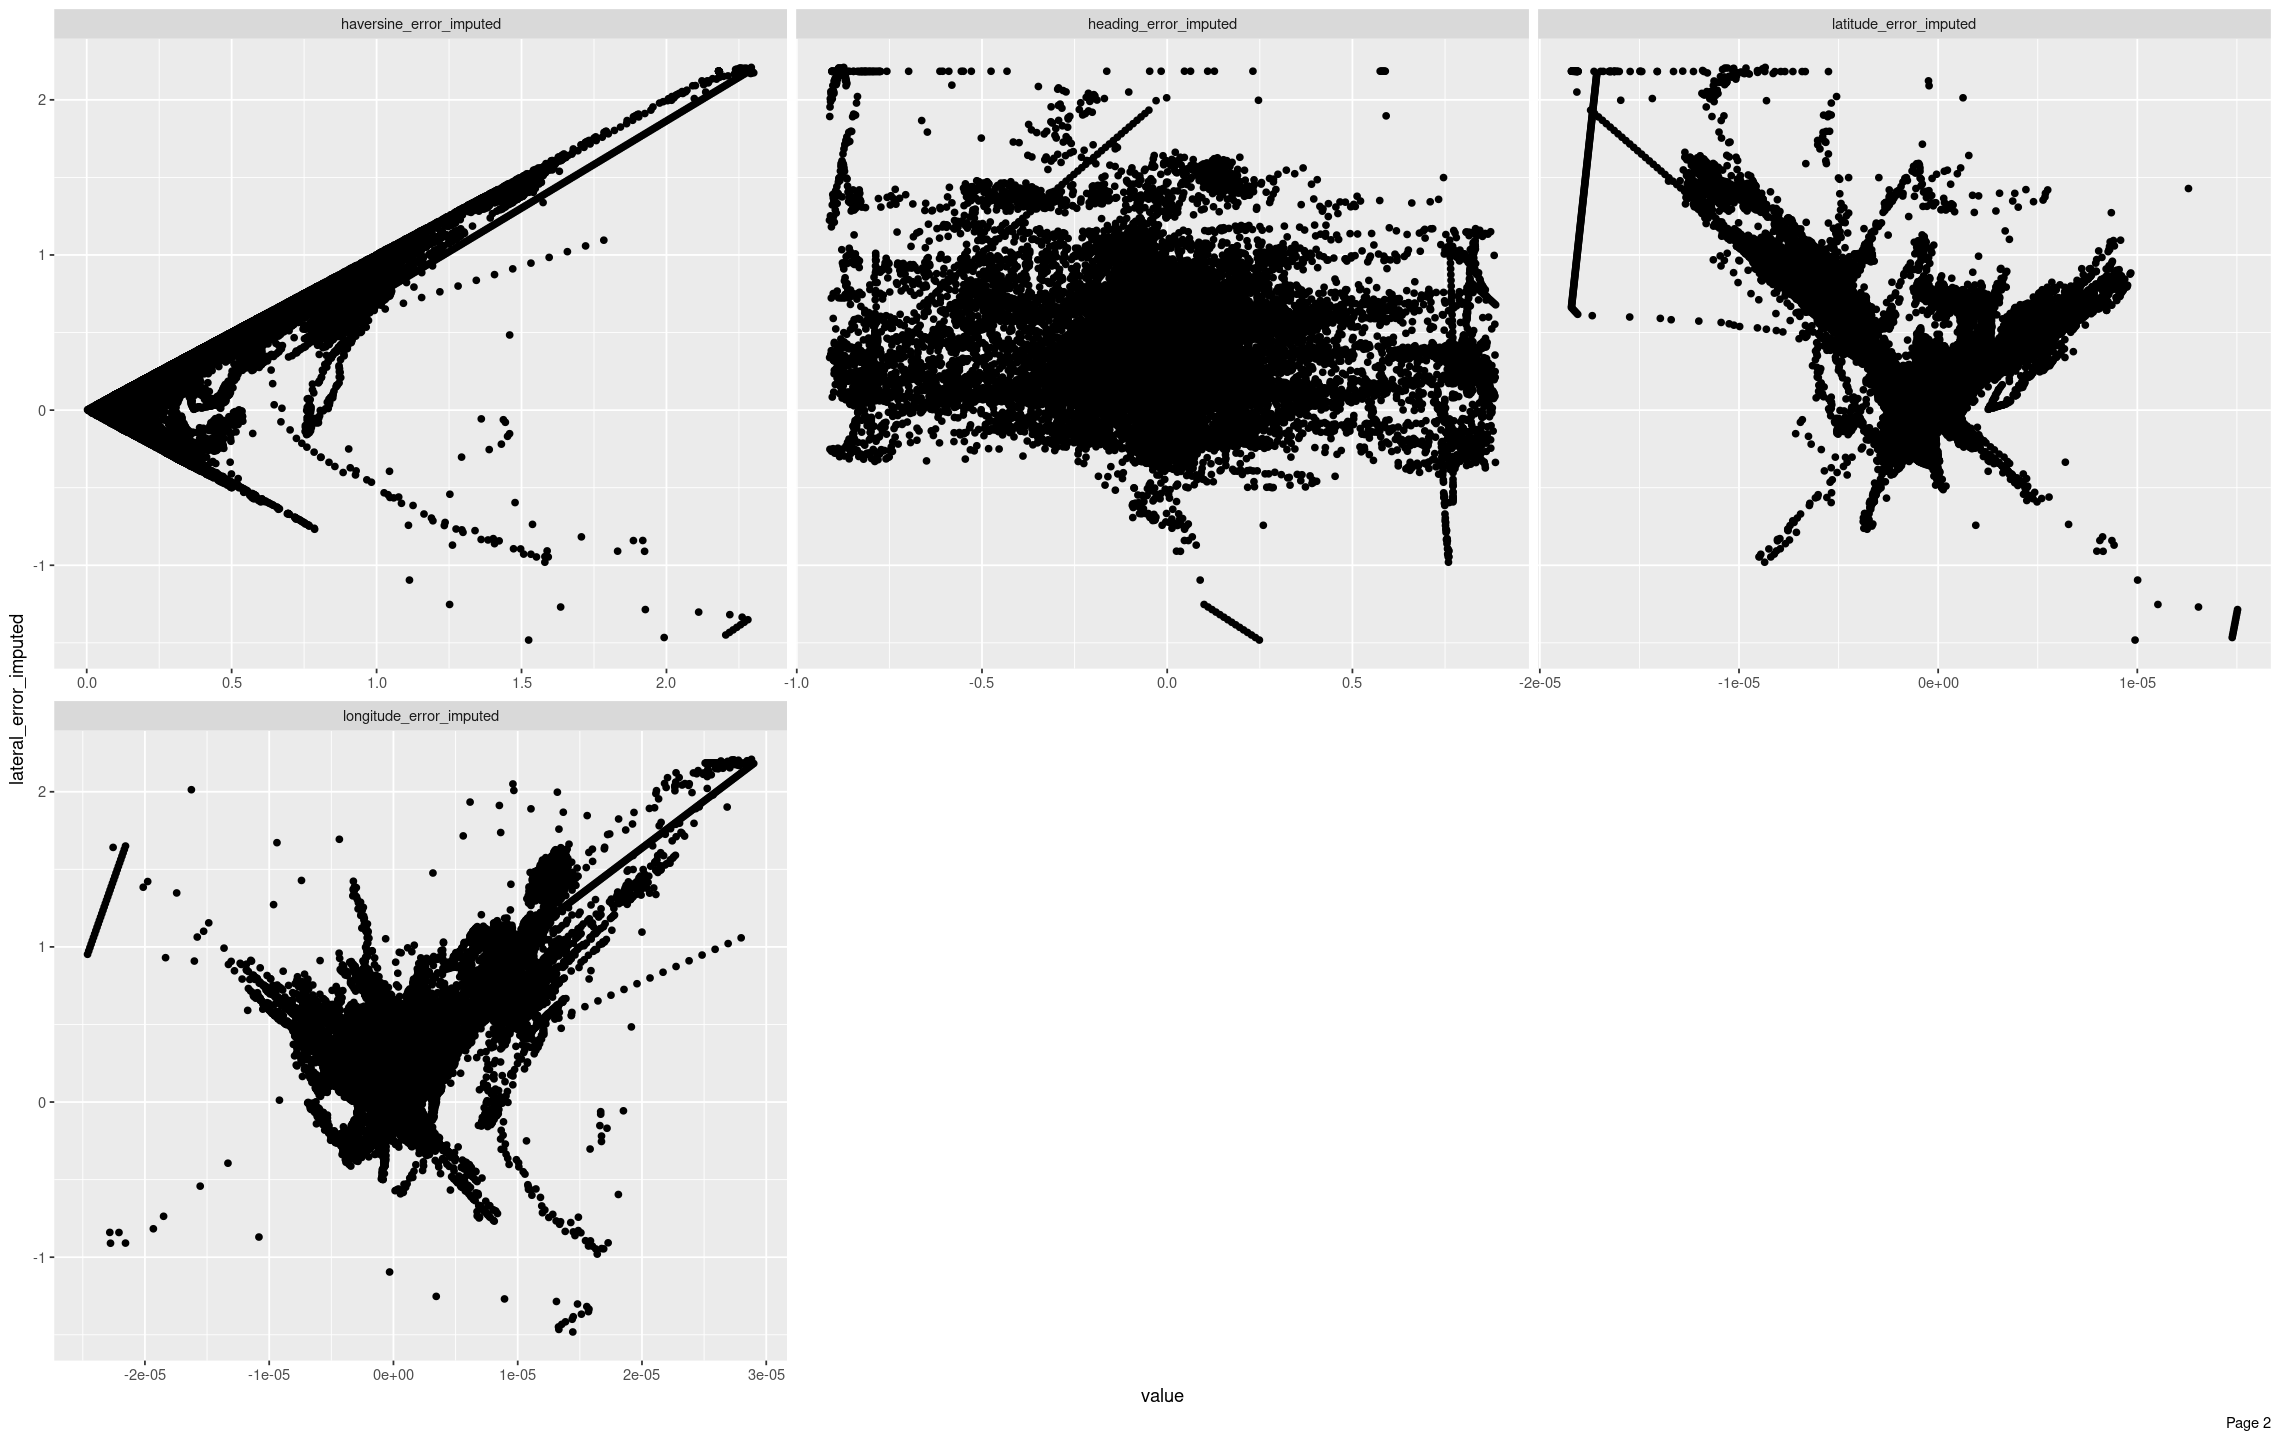

In [140]:
plot_scatterplot(na.omit(data_bis), by="lateral_error_imputed")

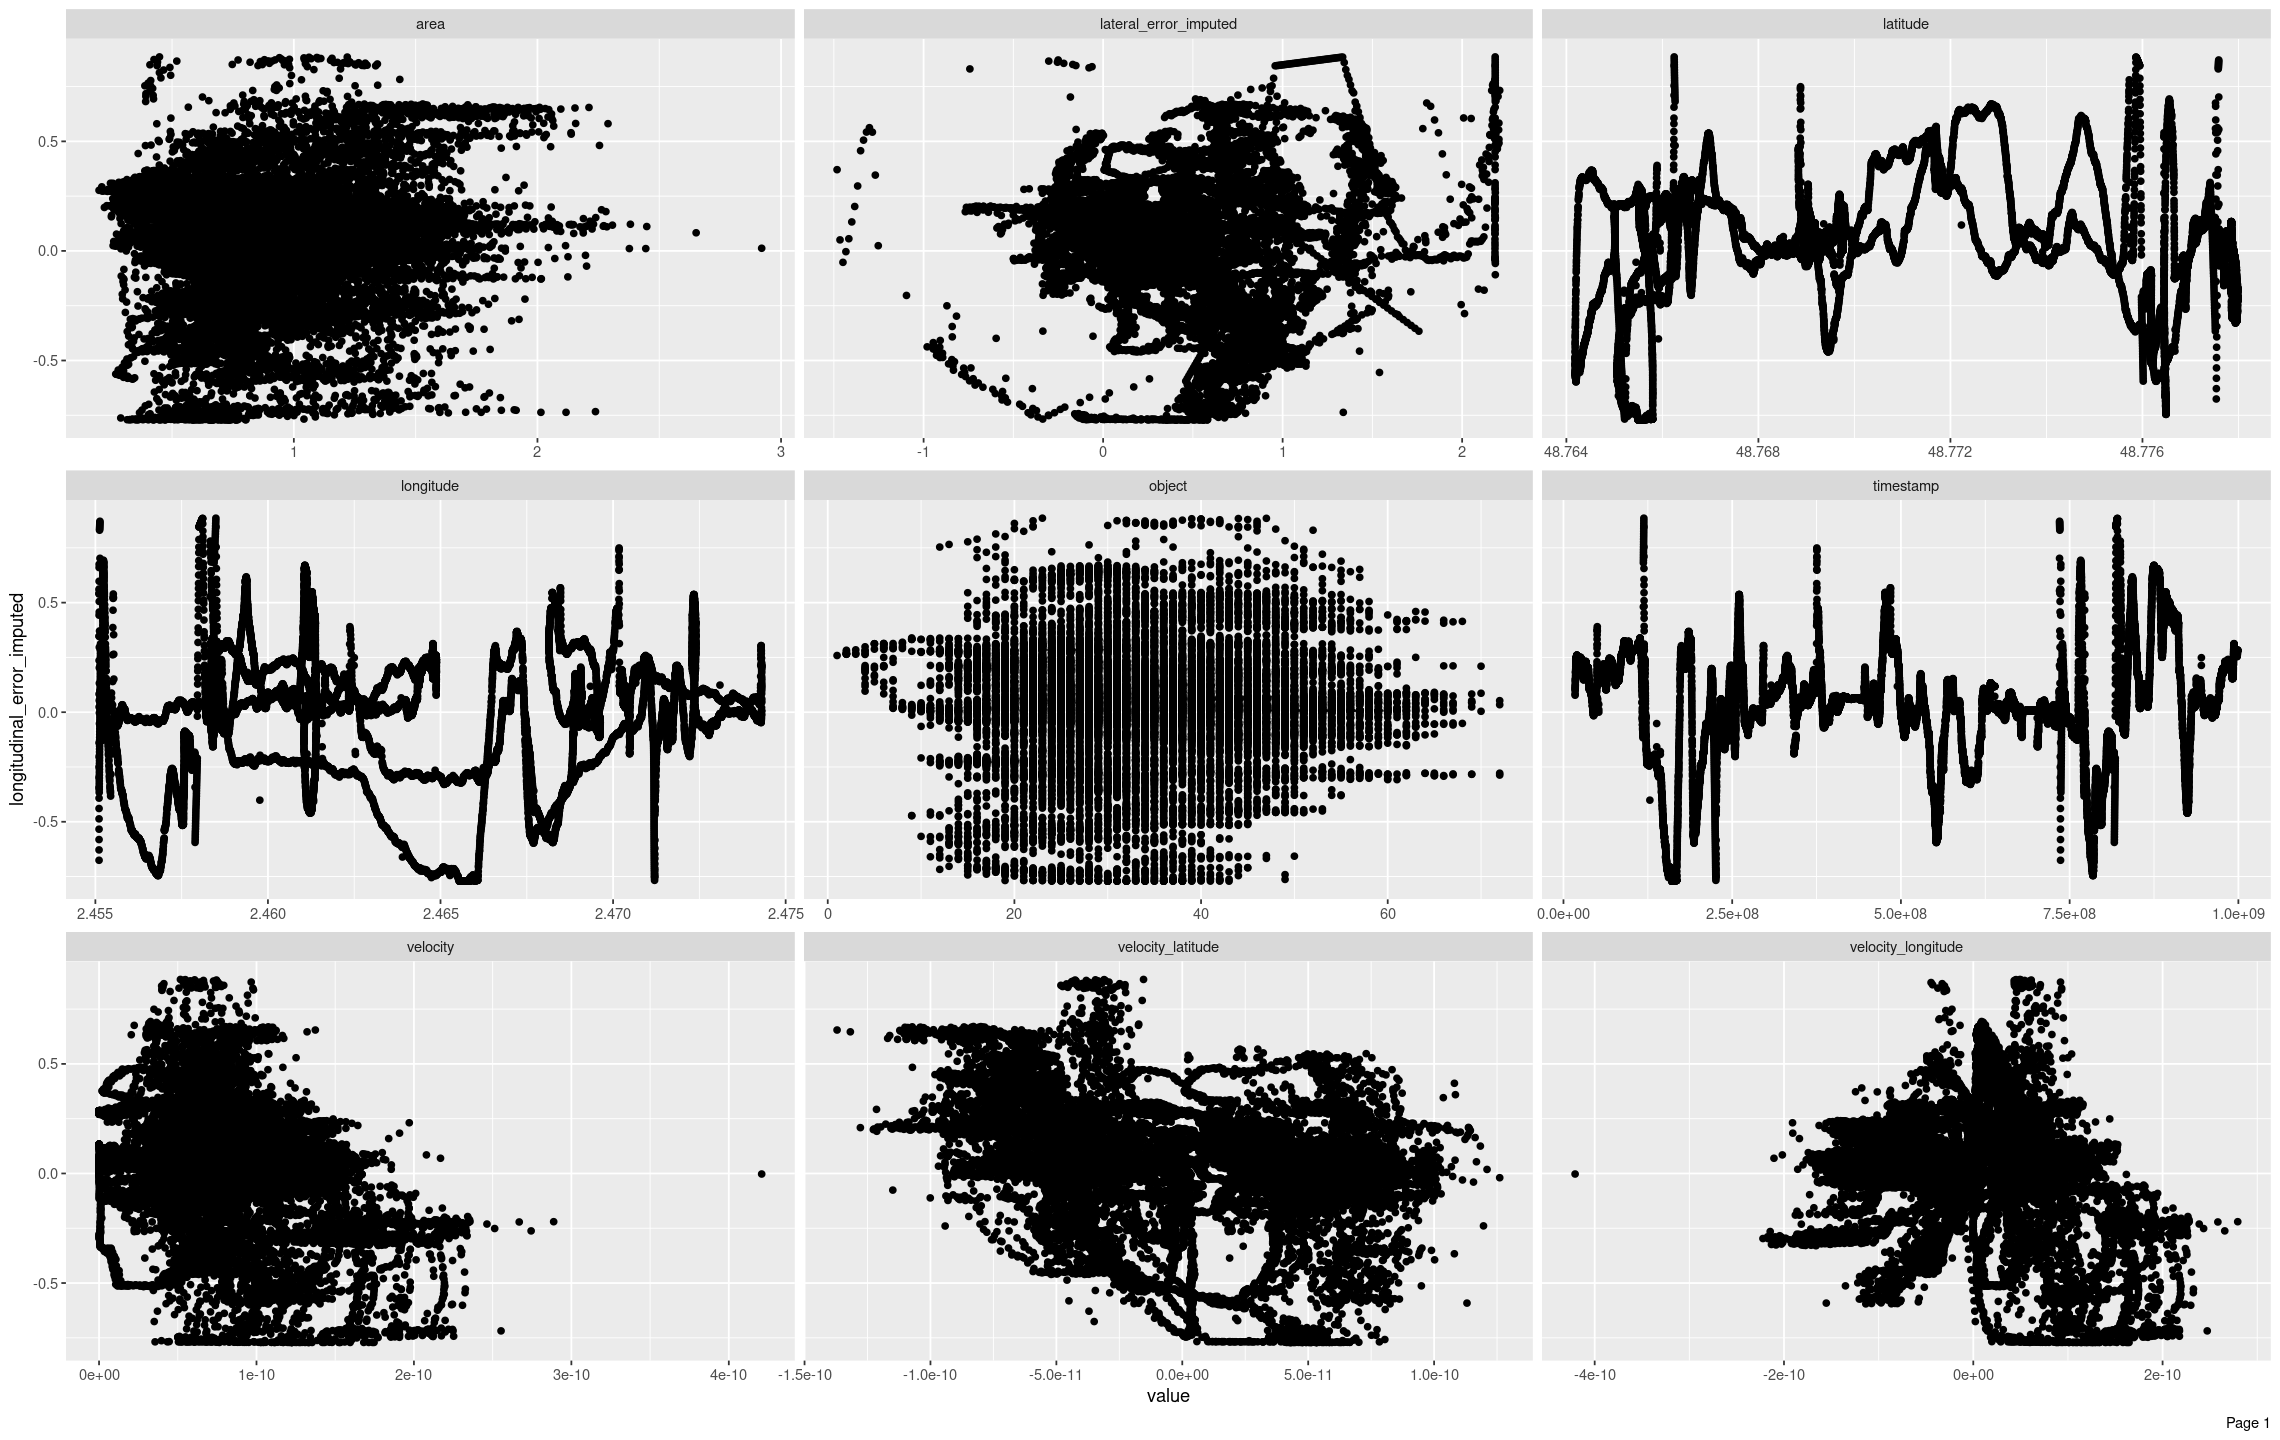

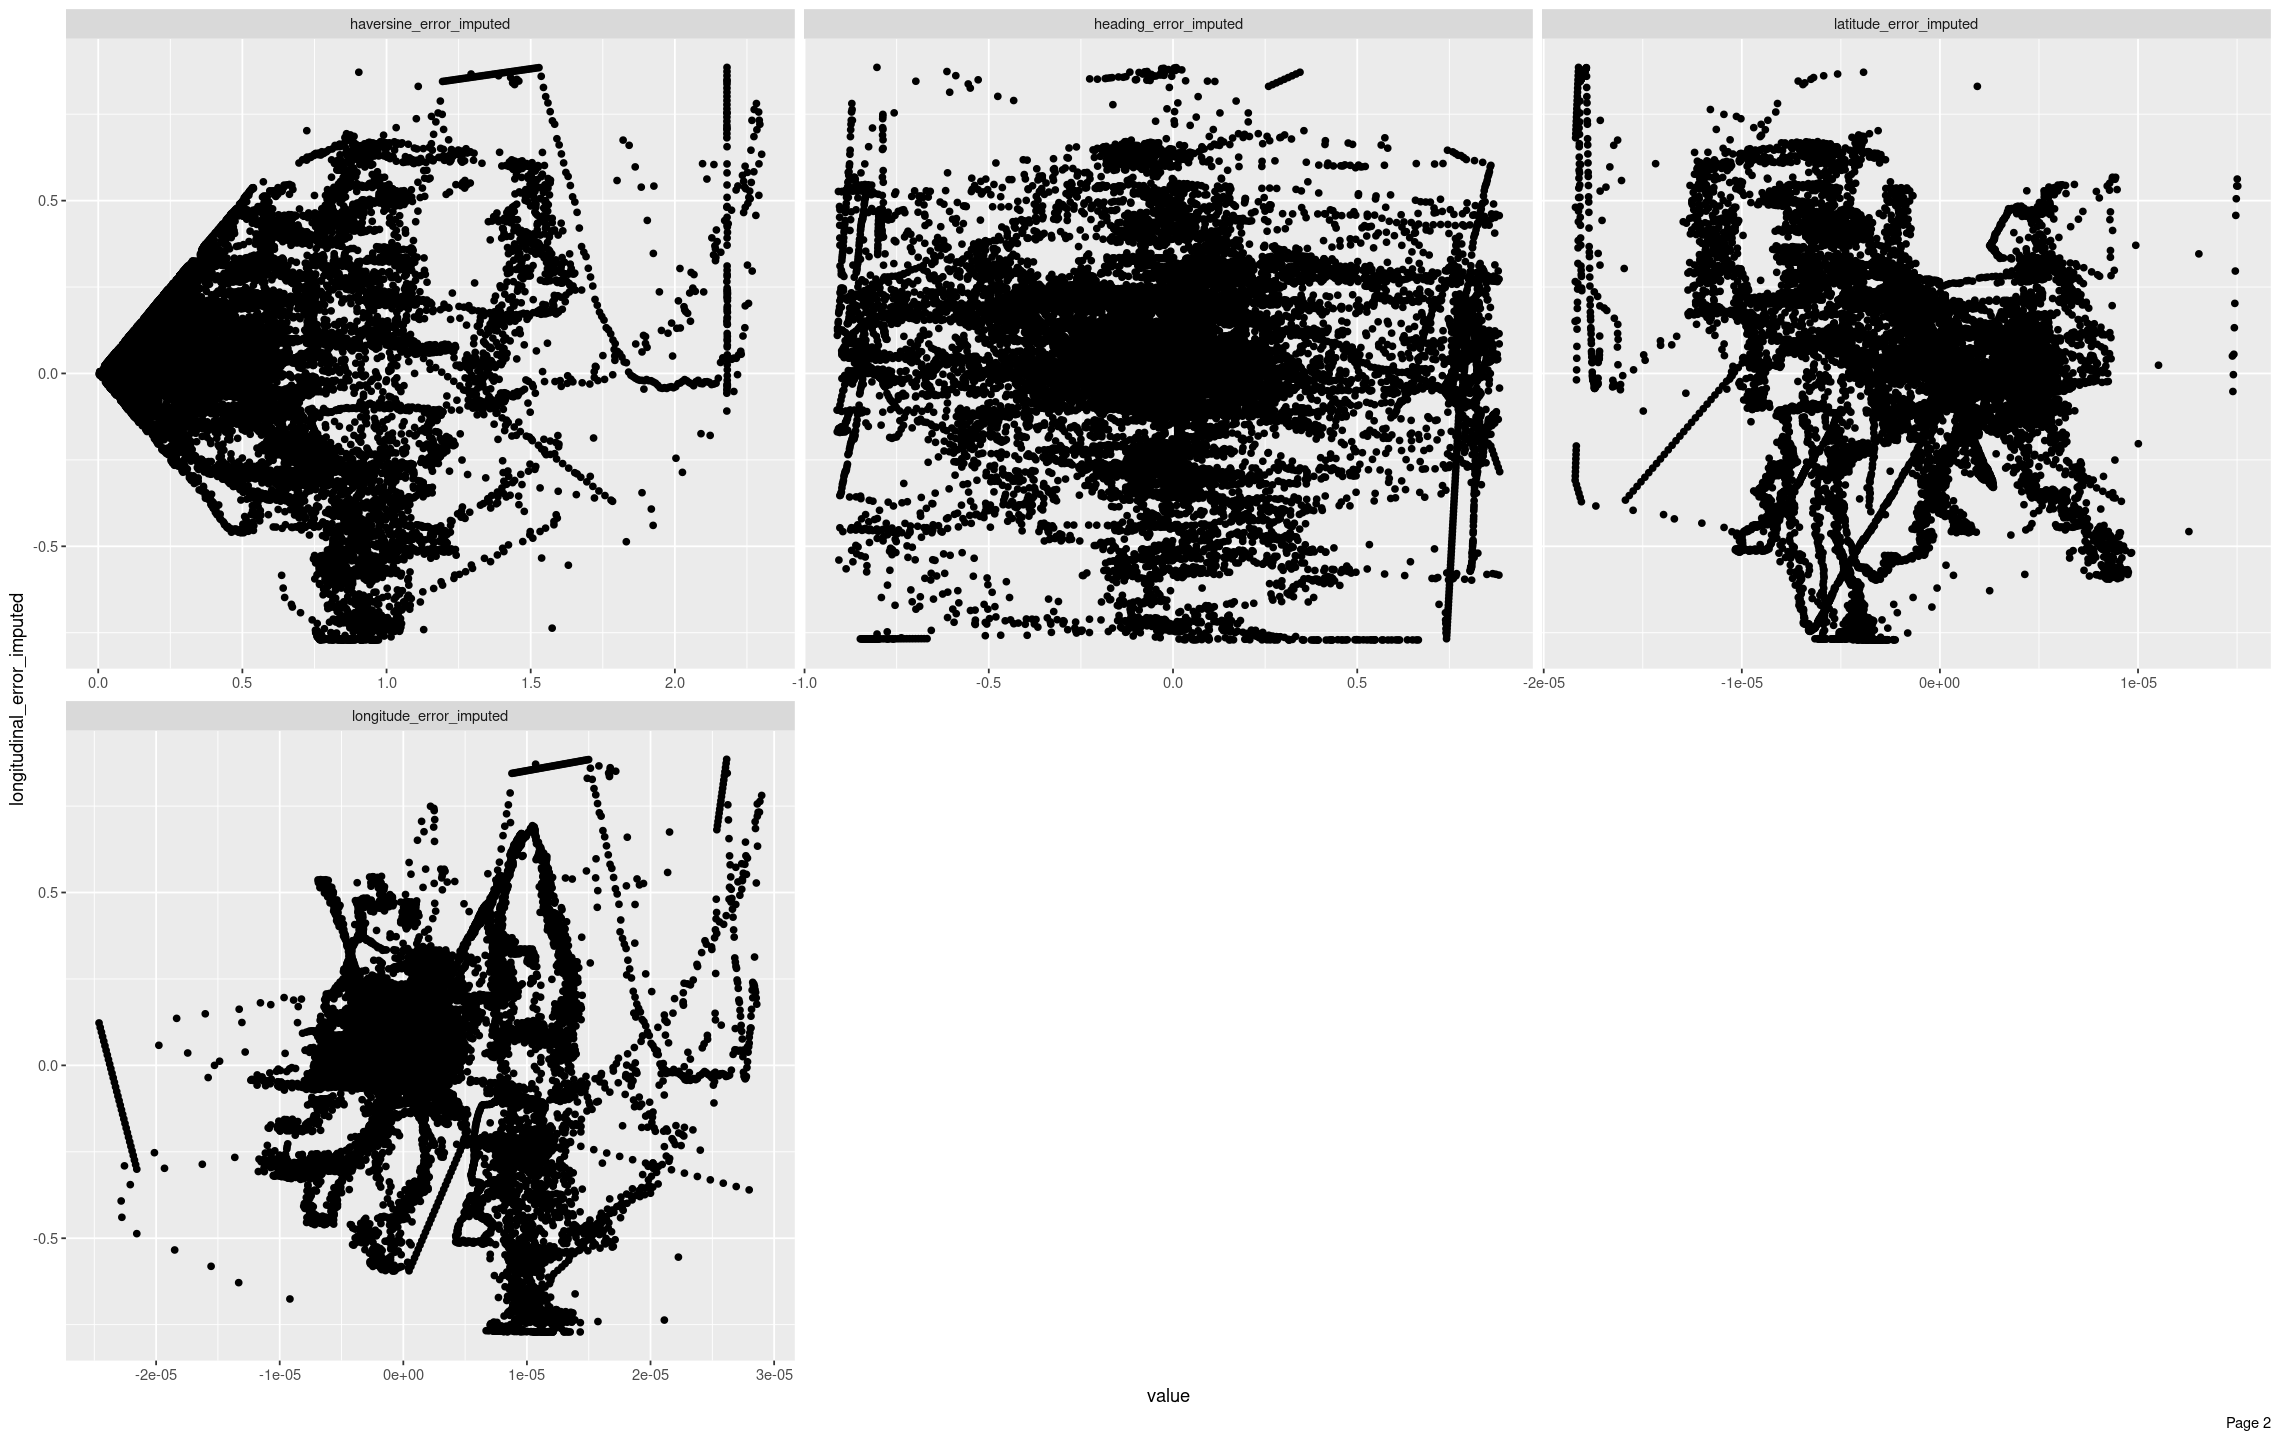

In [141]:
plot_scatterplot(na.omit(data_bis), by="longitudinal_error_imputed")

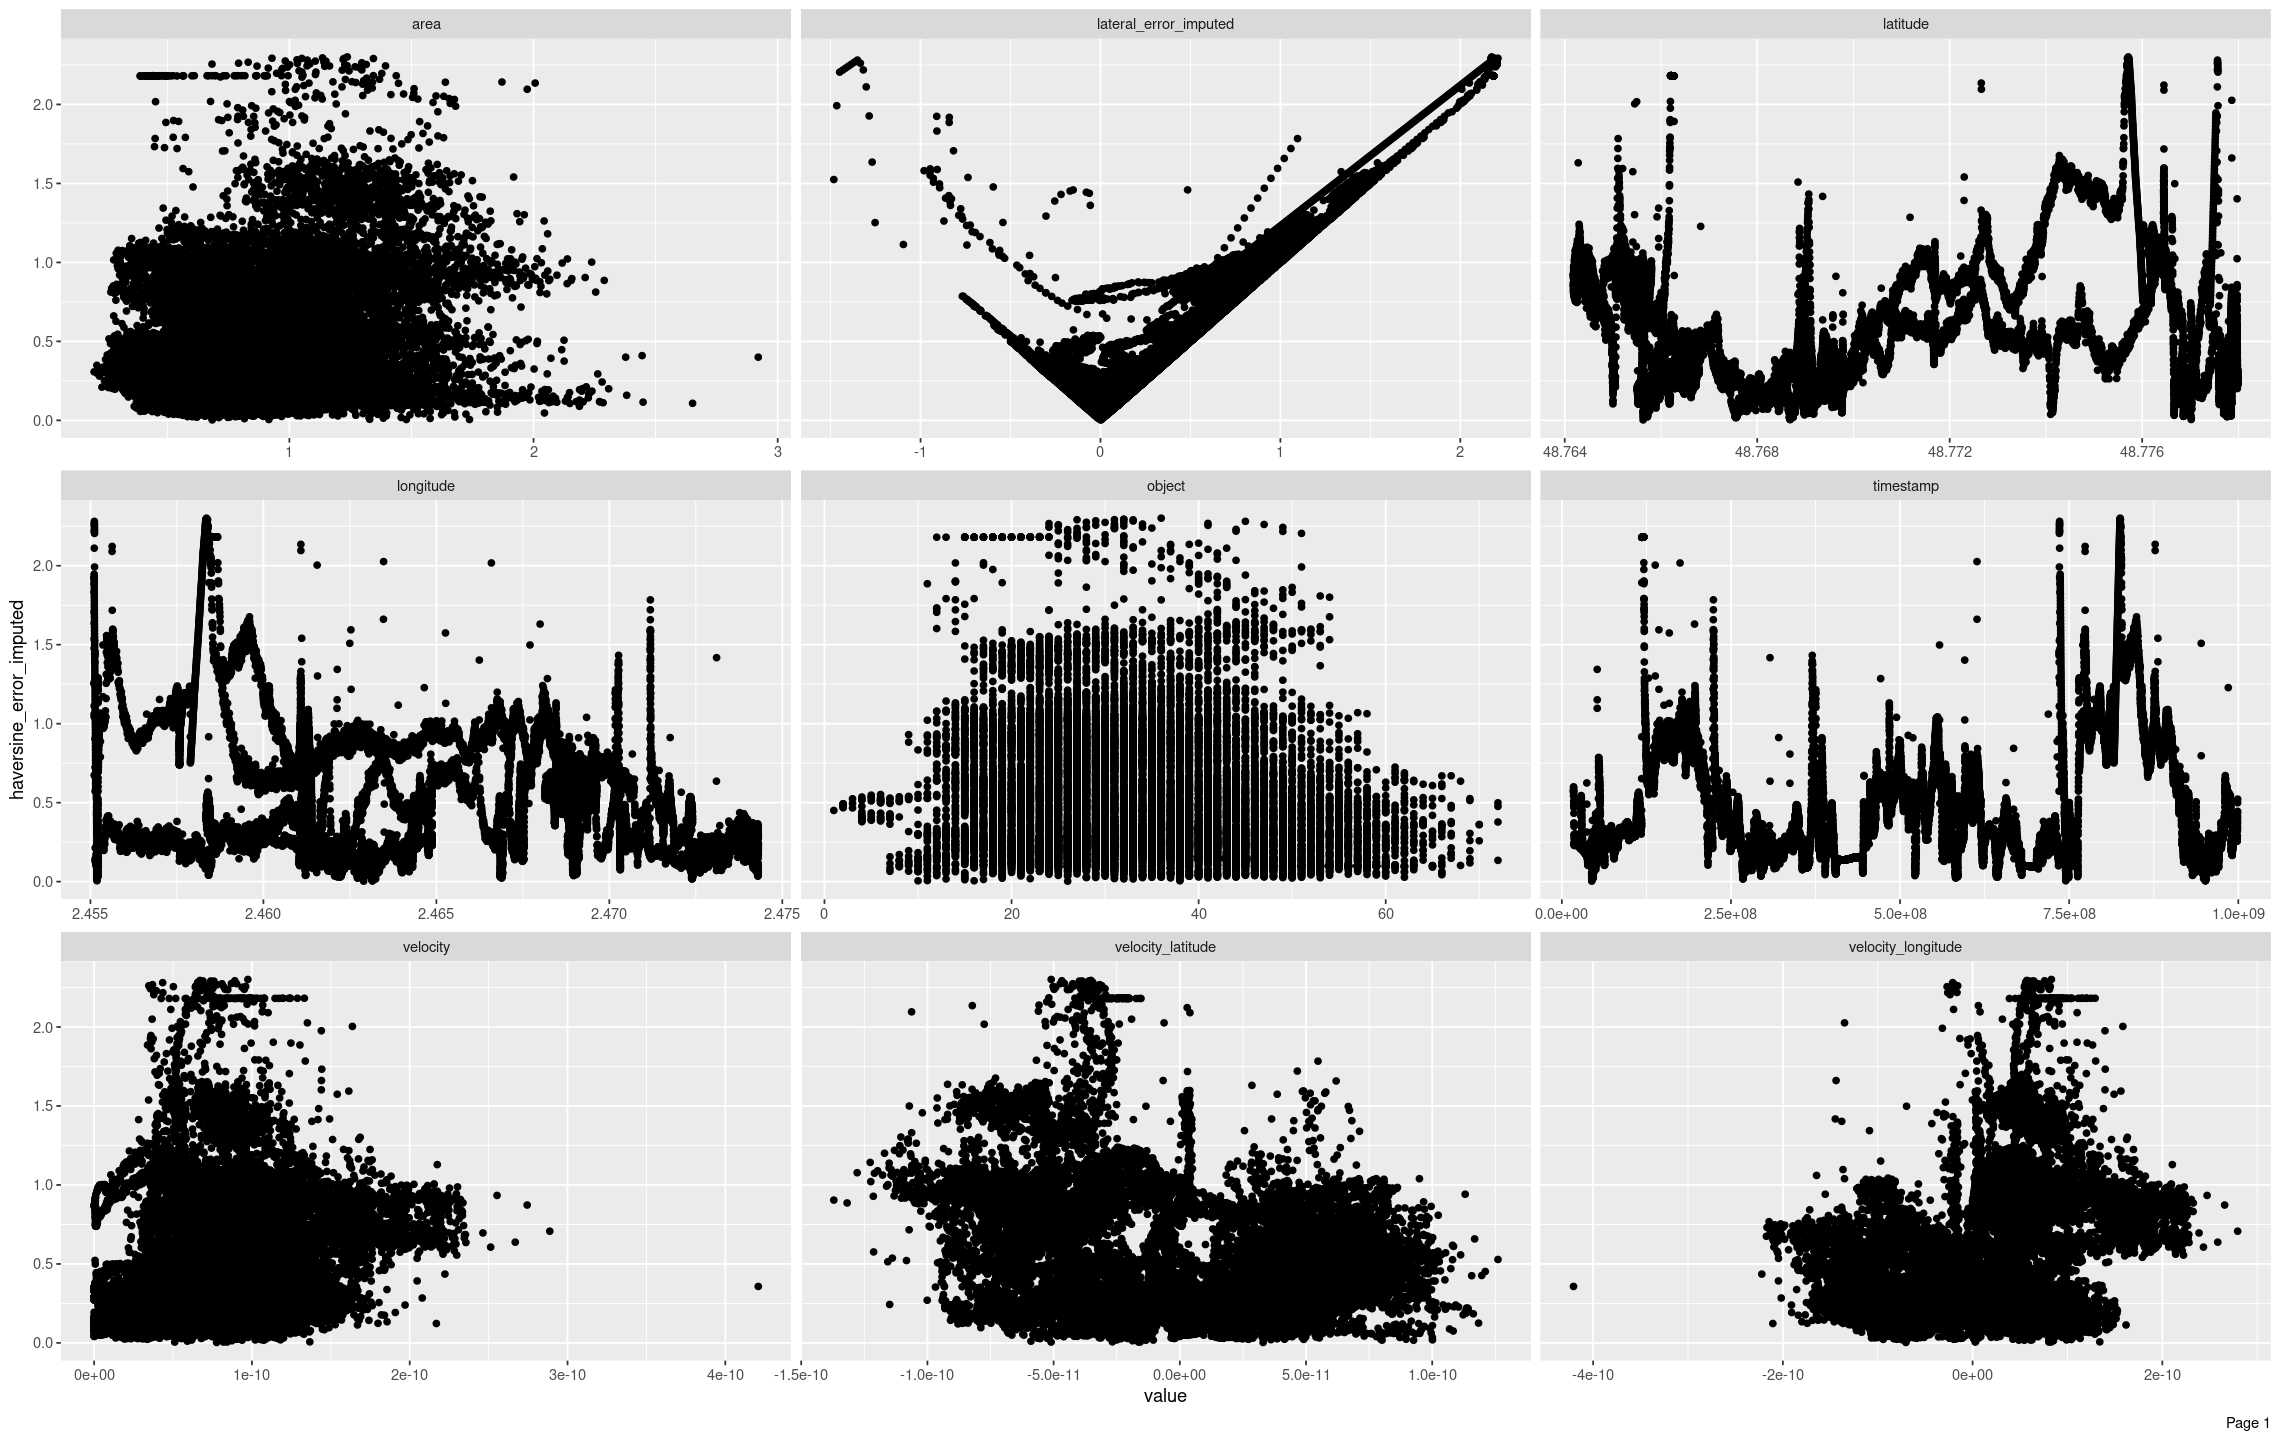

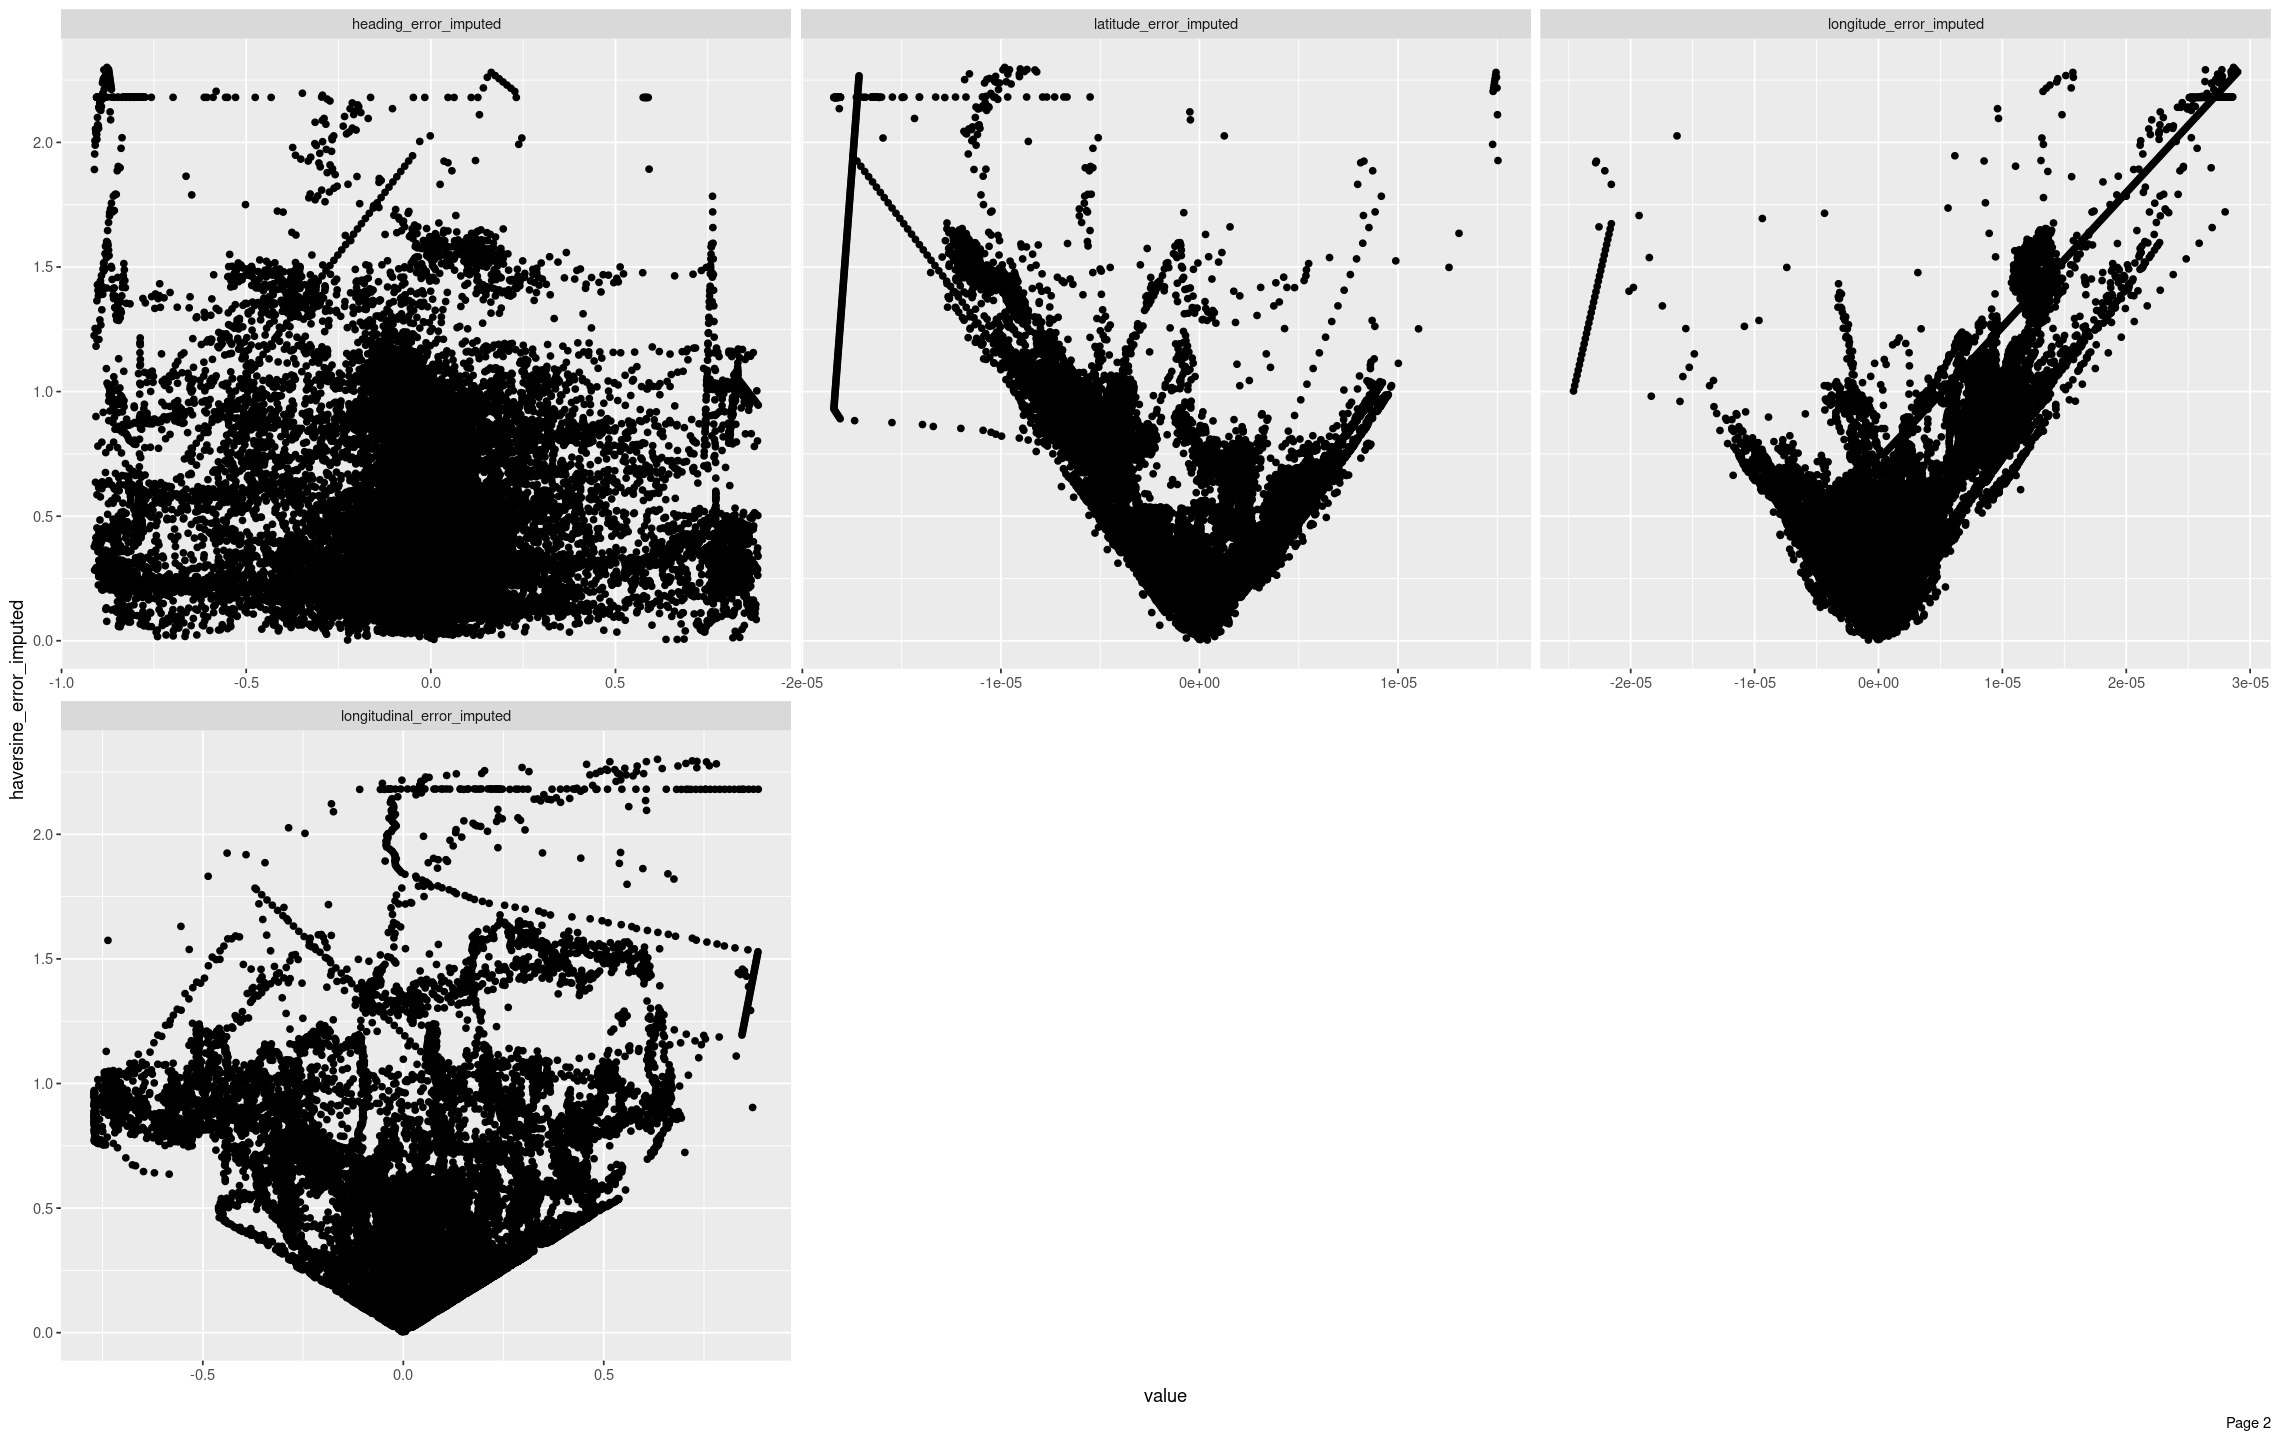

In [142]:
plot_scatterplot(na.omit(data_bis), by="haversine_error_imputed")

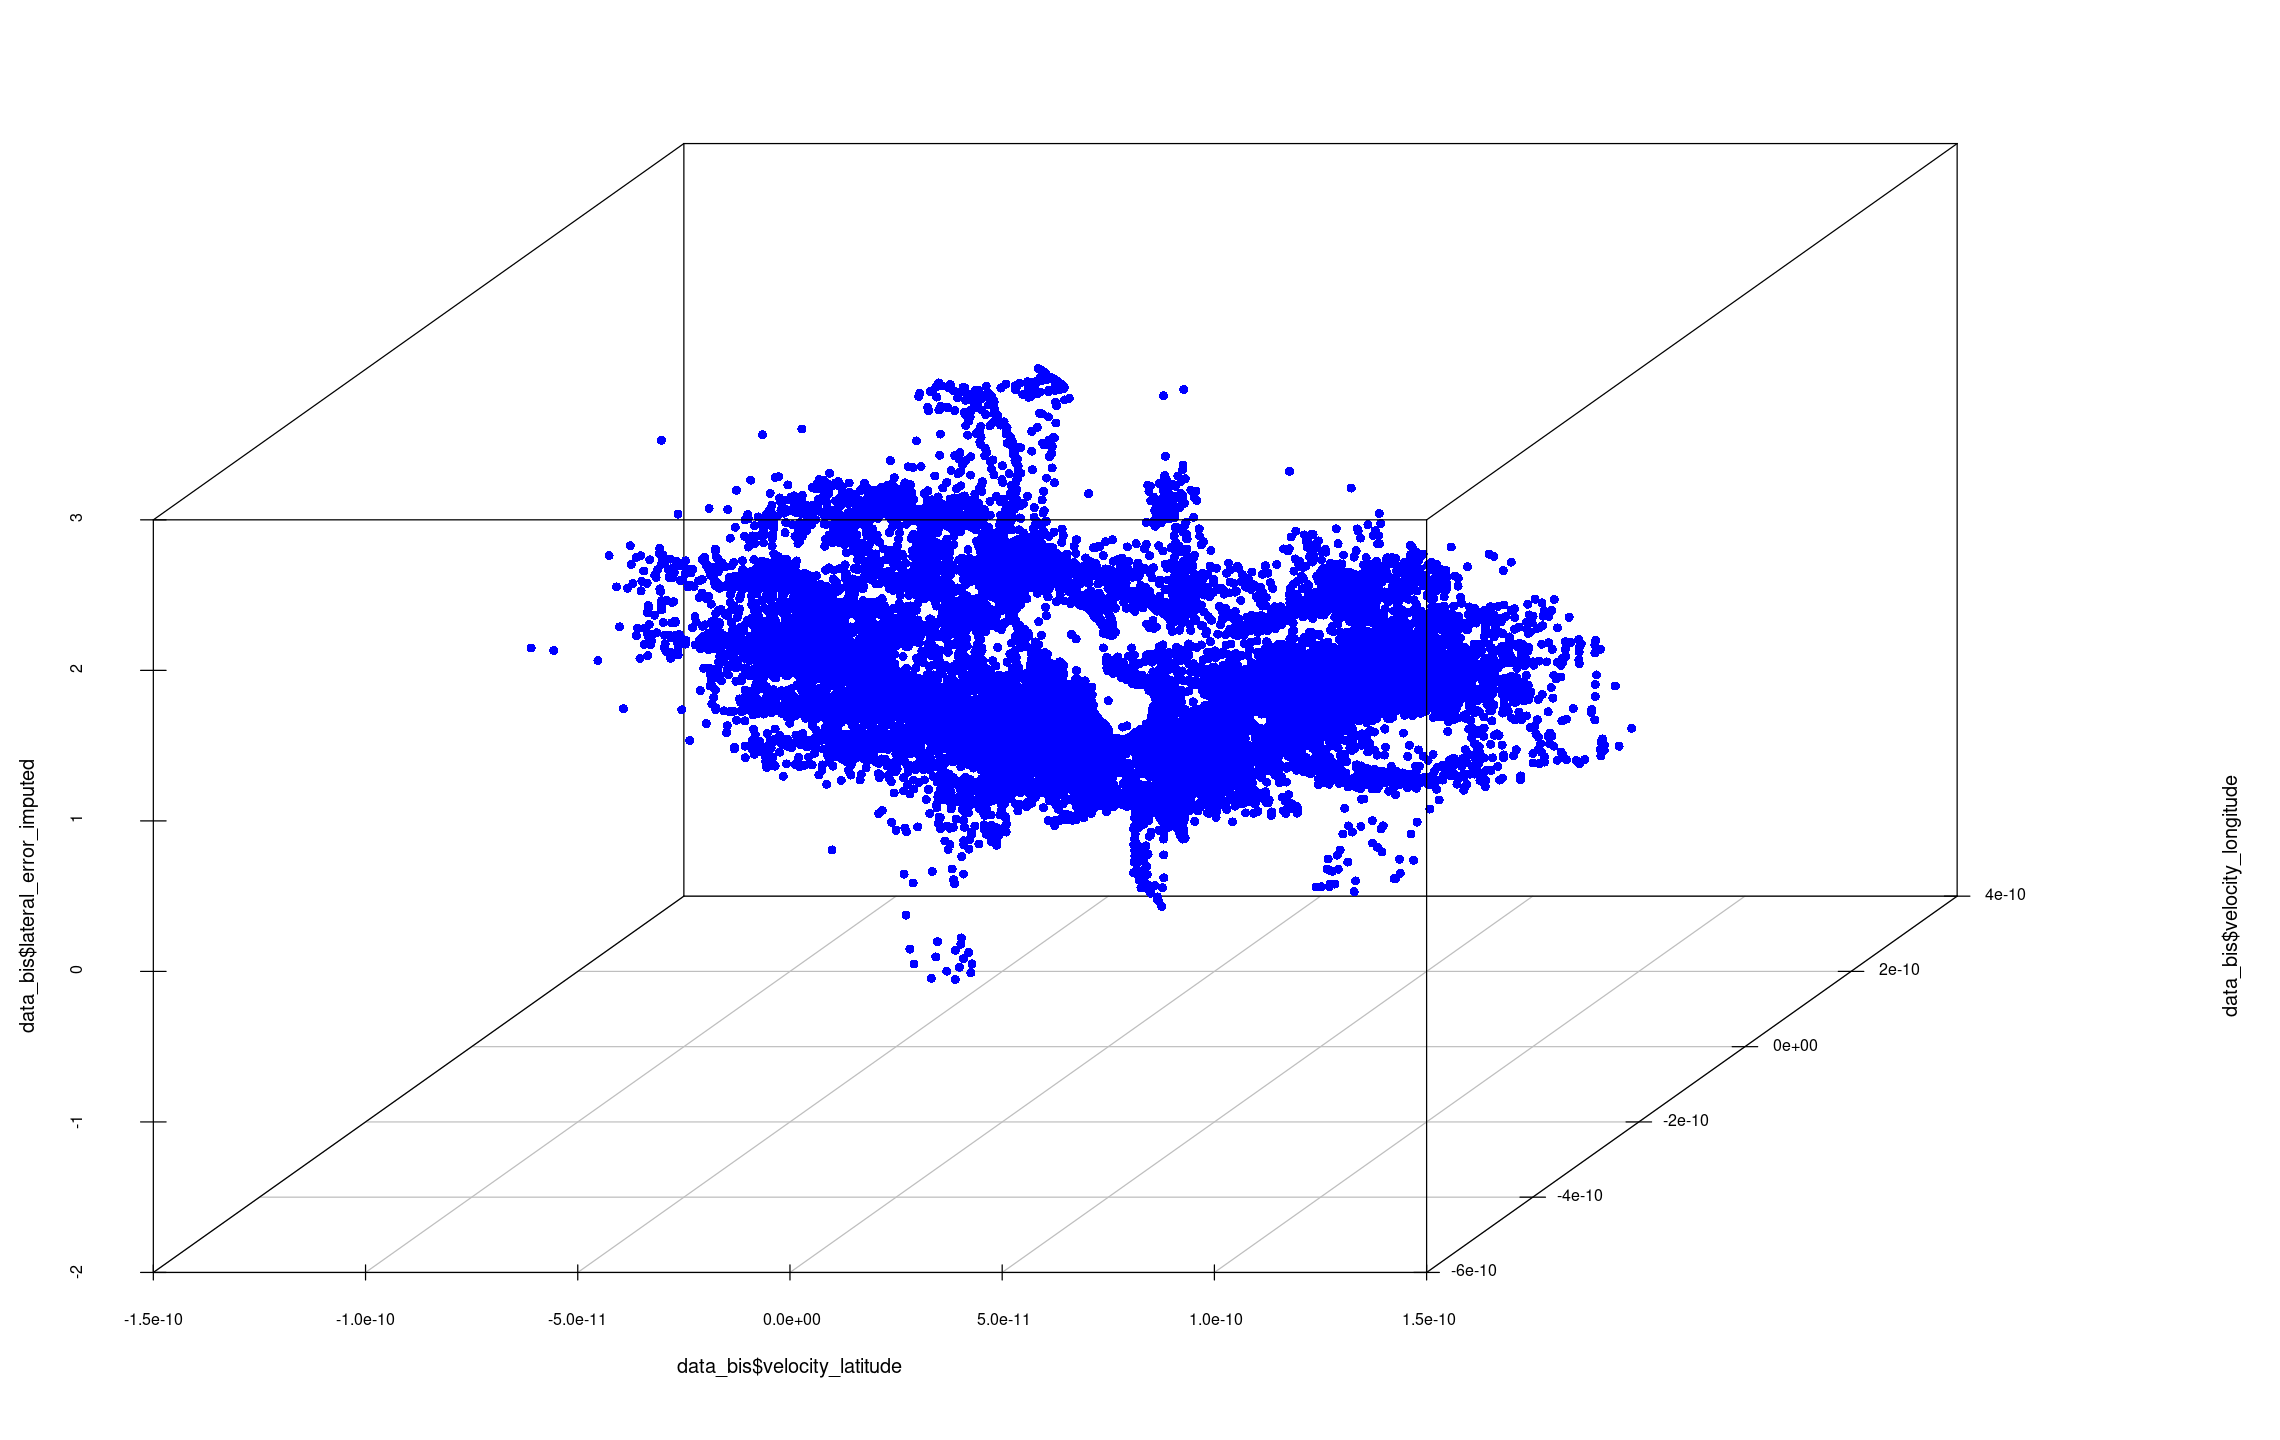

In [152]:
scatterplot3d(x = data_bis$velocity_latitude, 
              y = data_bis$velocity_longitude, 
              z = data_bis$lateral_error_imputed, 
              angle = 45, 
              type = "p",
              pch = 16, 
              color="blue")

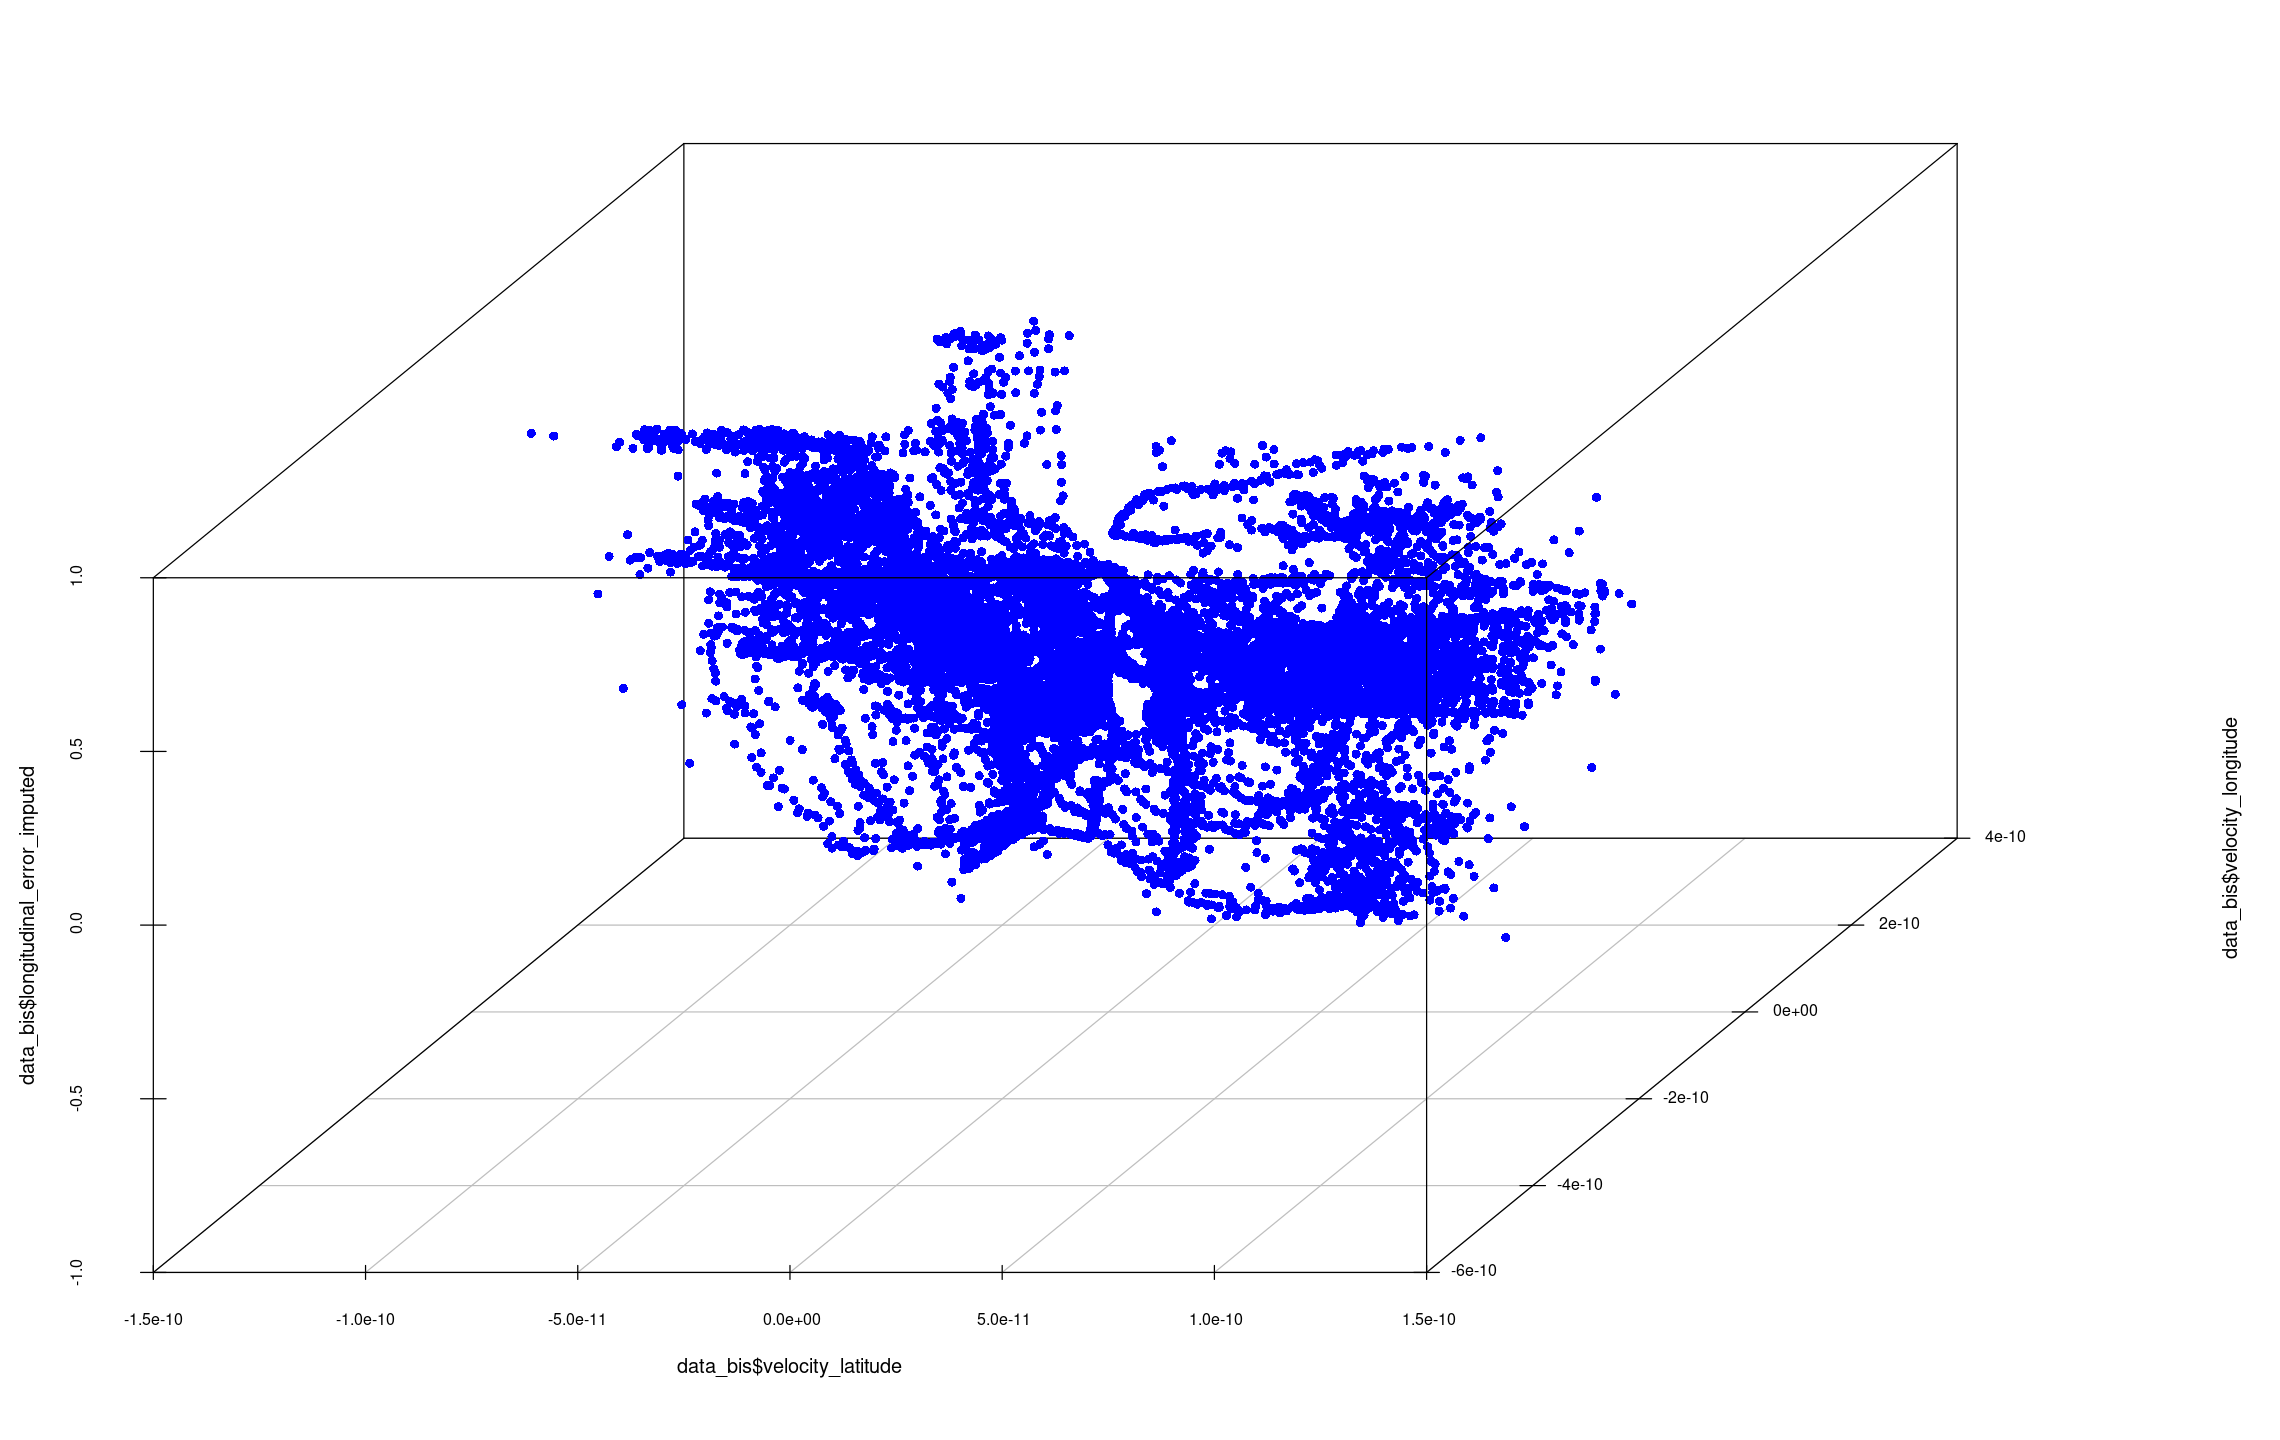

In [153]:
scatterplot3d(x = data_bis$velocity_latitude, 
              y = data_bis$velocity_longitude, 
              z = data_bis$longitudinal_error_imputed, 
              angle = 45, 
              type = "p",
              pch = 16, 
              color="blue")

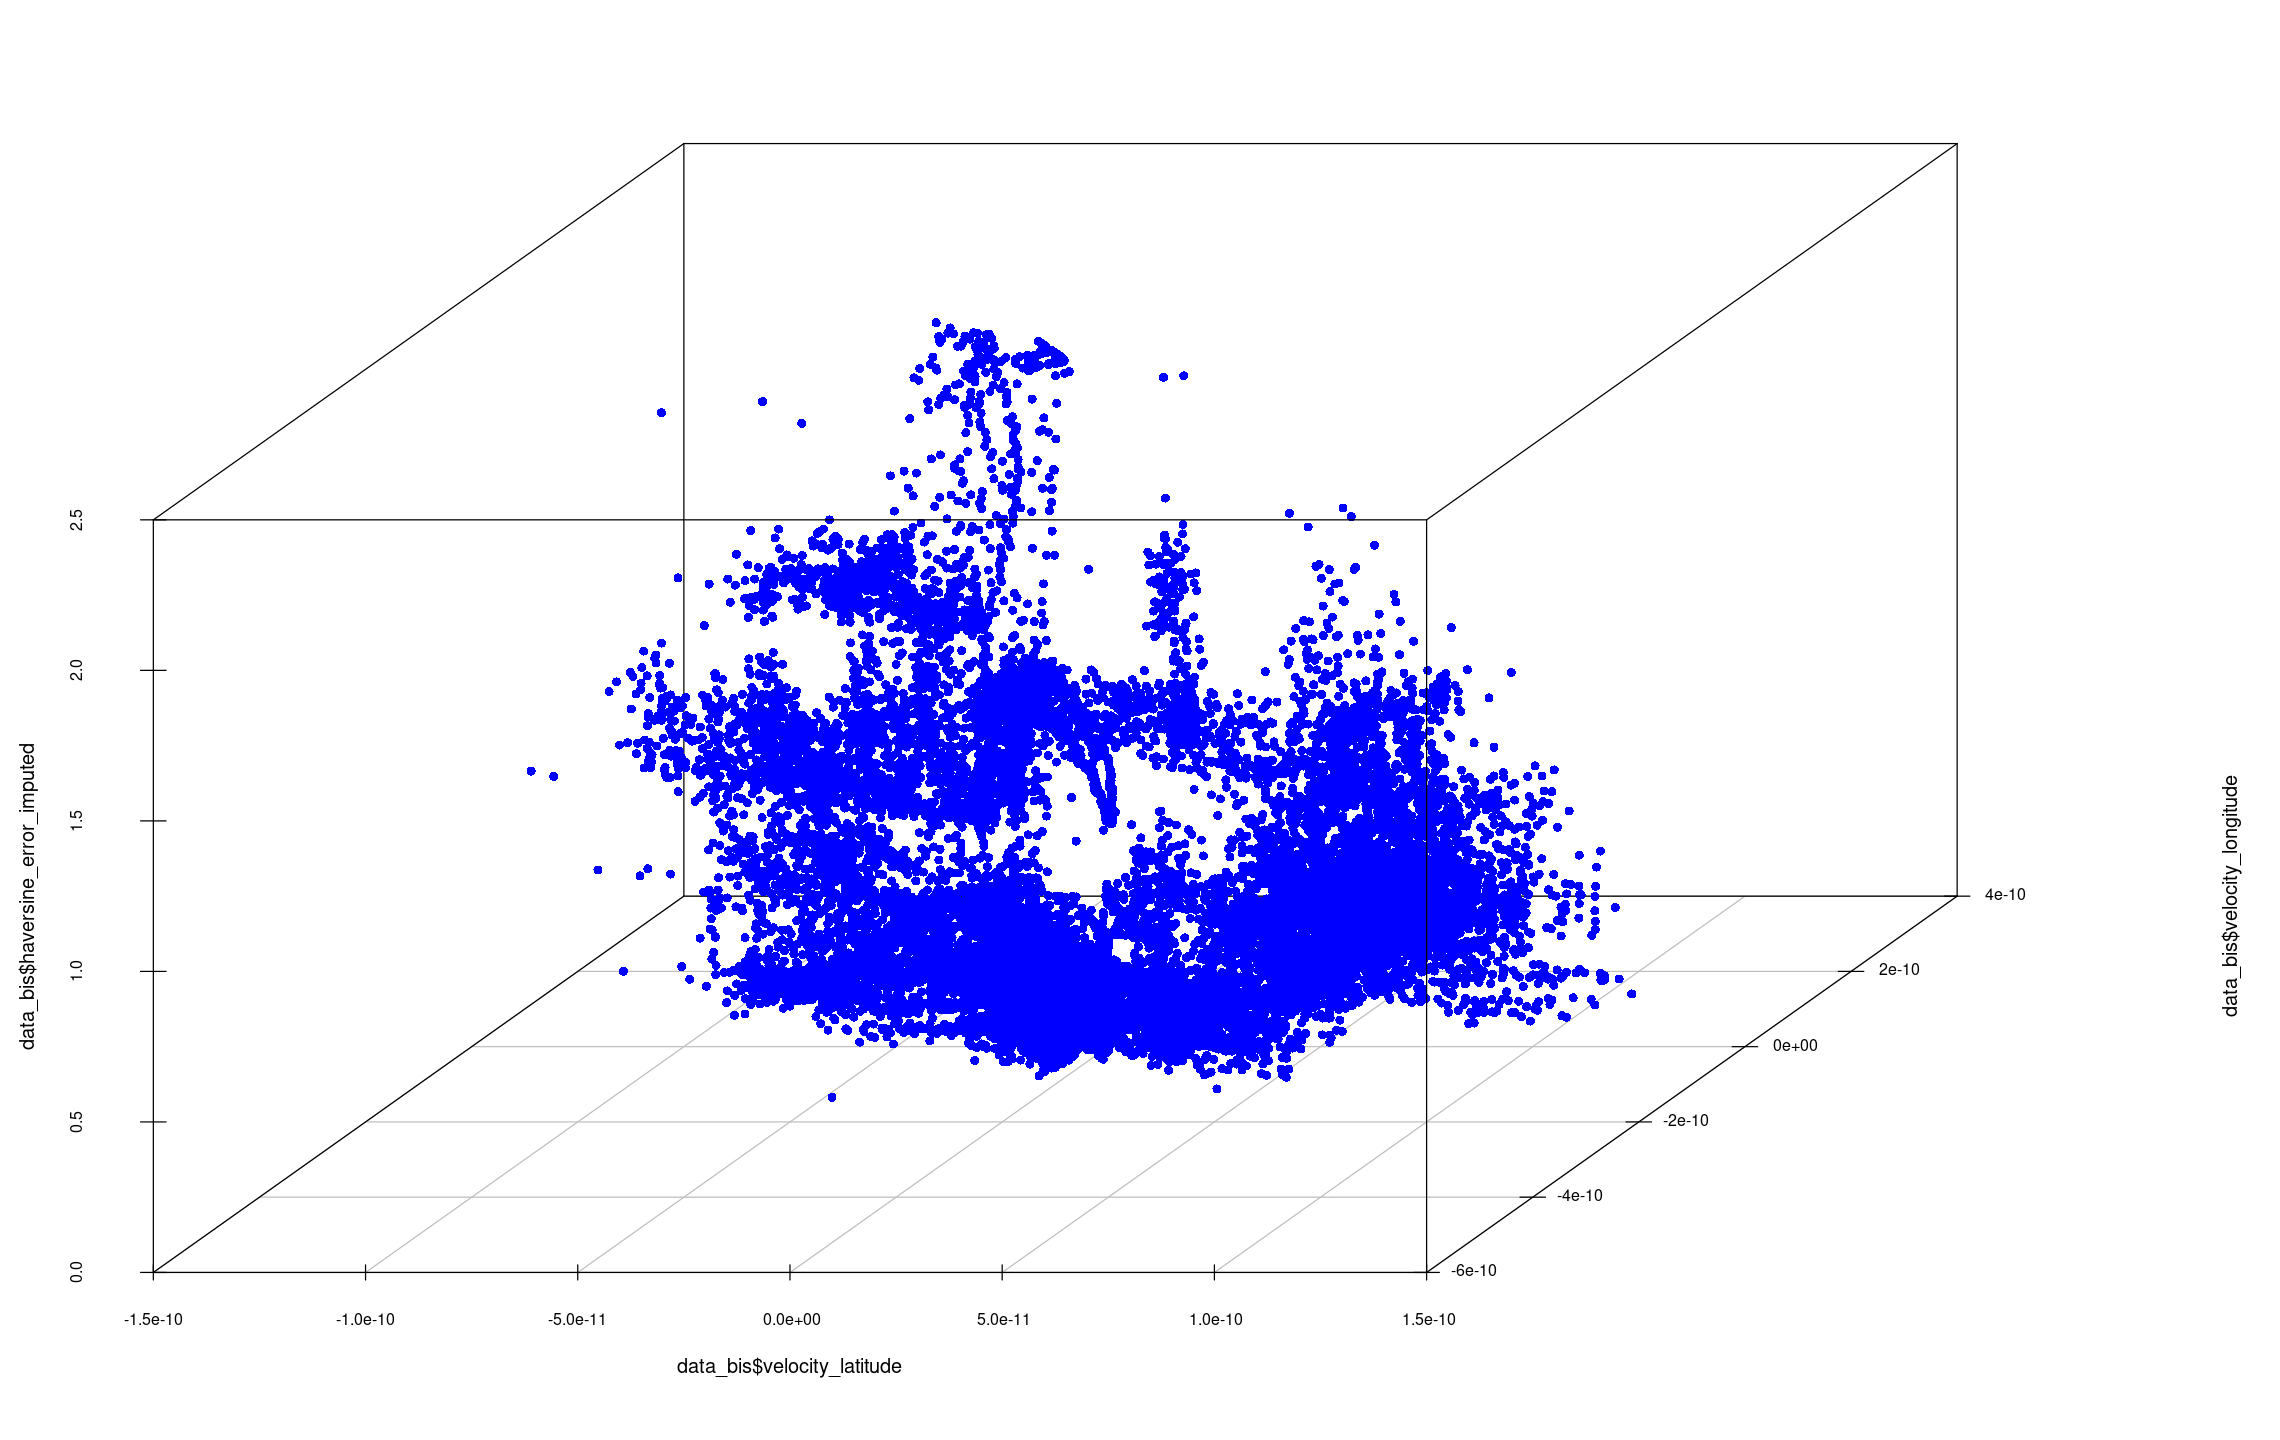

In [154]:
scatterplot3d(x = data_bis$velocity_latitude, 
              y = data_bis$velocity_longitude, 
              z = data_bis$haversine_error_imputed, 
              angle = 45, 
              type = "p",
              pch = 16, 
              color="blue")

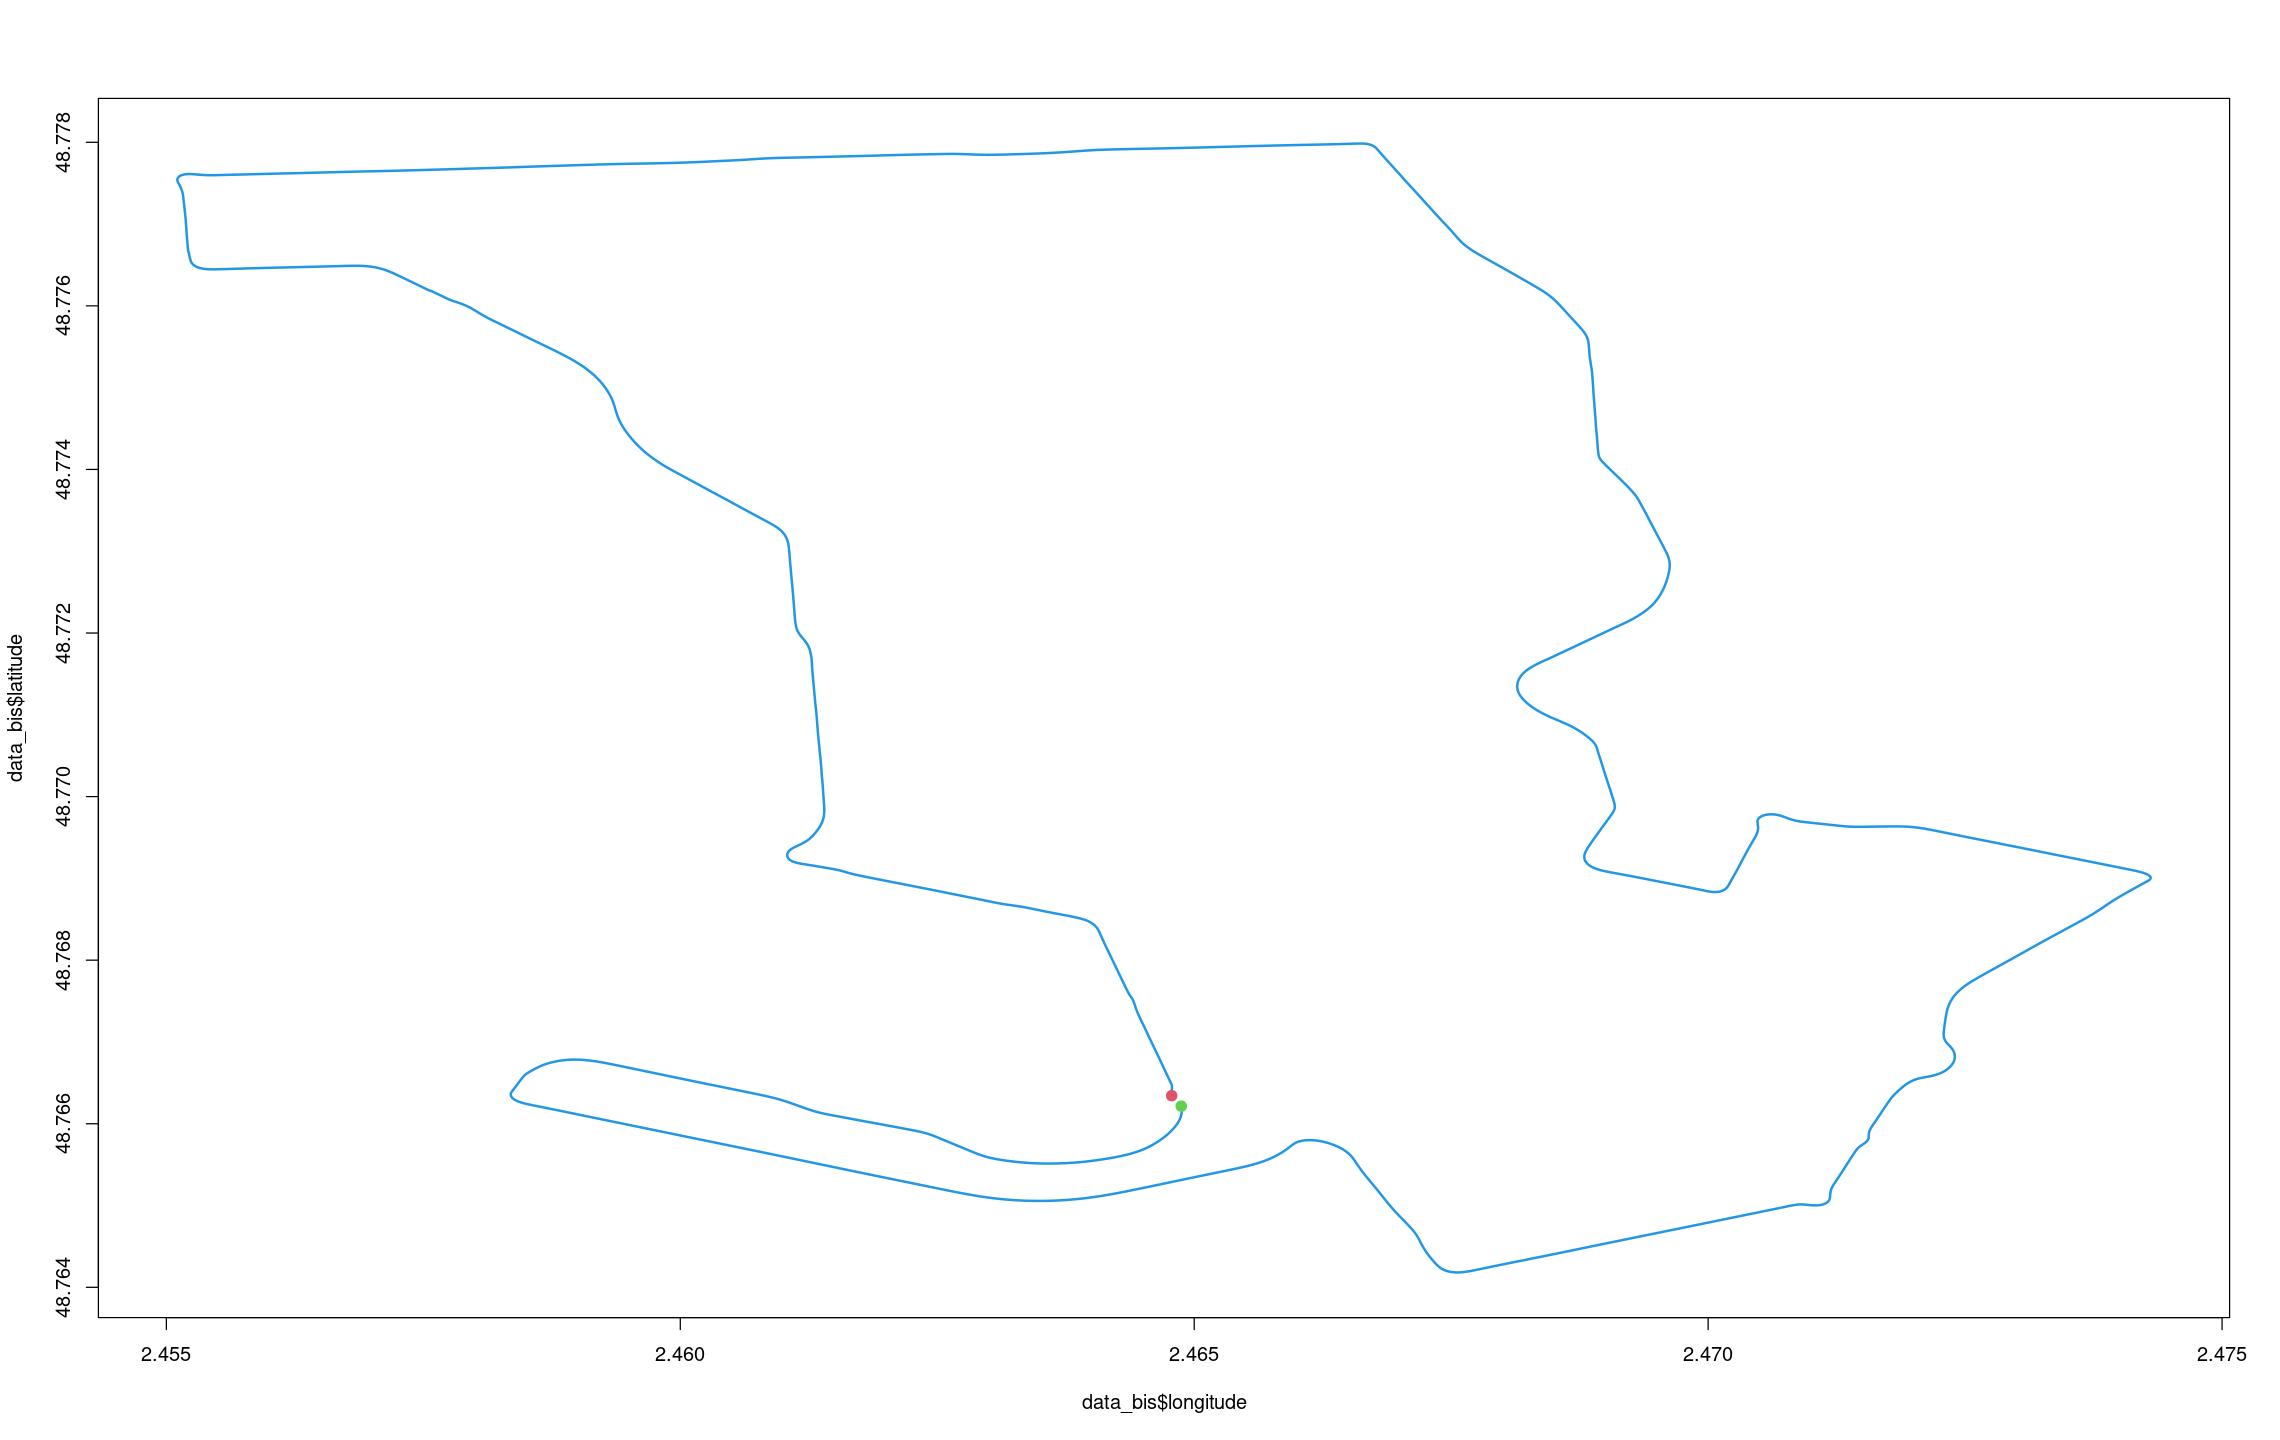

In [199]:
plot(y = data_bis$latitude, 
     x = data_bis$longitude,
     type = "l",
     col = 4,
     lwd = 2)

points(y = data_bis$latitude[1],
       x = data_bis$longitude[1],
       pch = 19,
       col = 3,
       lwd = 2)

n <- nrow(data_bis)

points(y = data_bis$latitude[n],
       x = data_bis$longitude[n],
       pch = 19,
       col = 2,
       lwd = 2)


In [211]:
covariates_outliers <- data_bis[outlier_positions, c("velocity_latitude", "velocity_longitude", 
                                                     "velocity", "area", "object")]

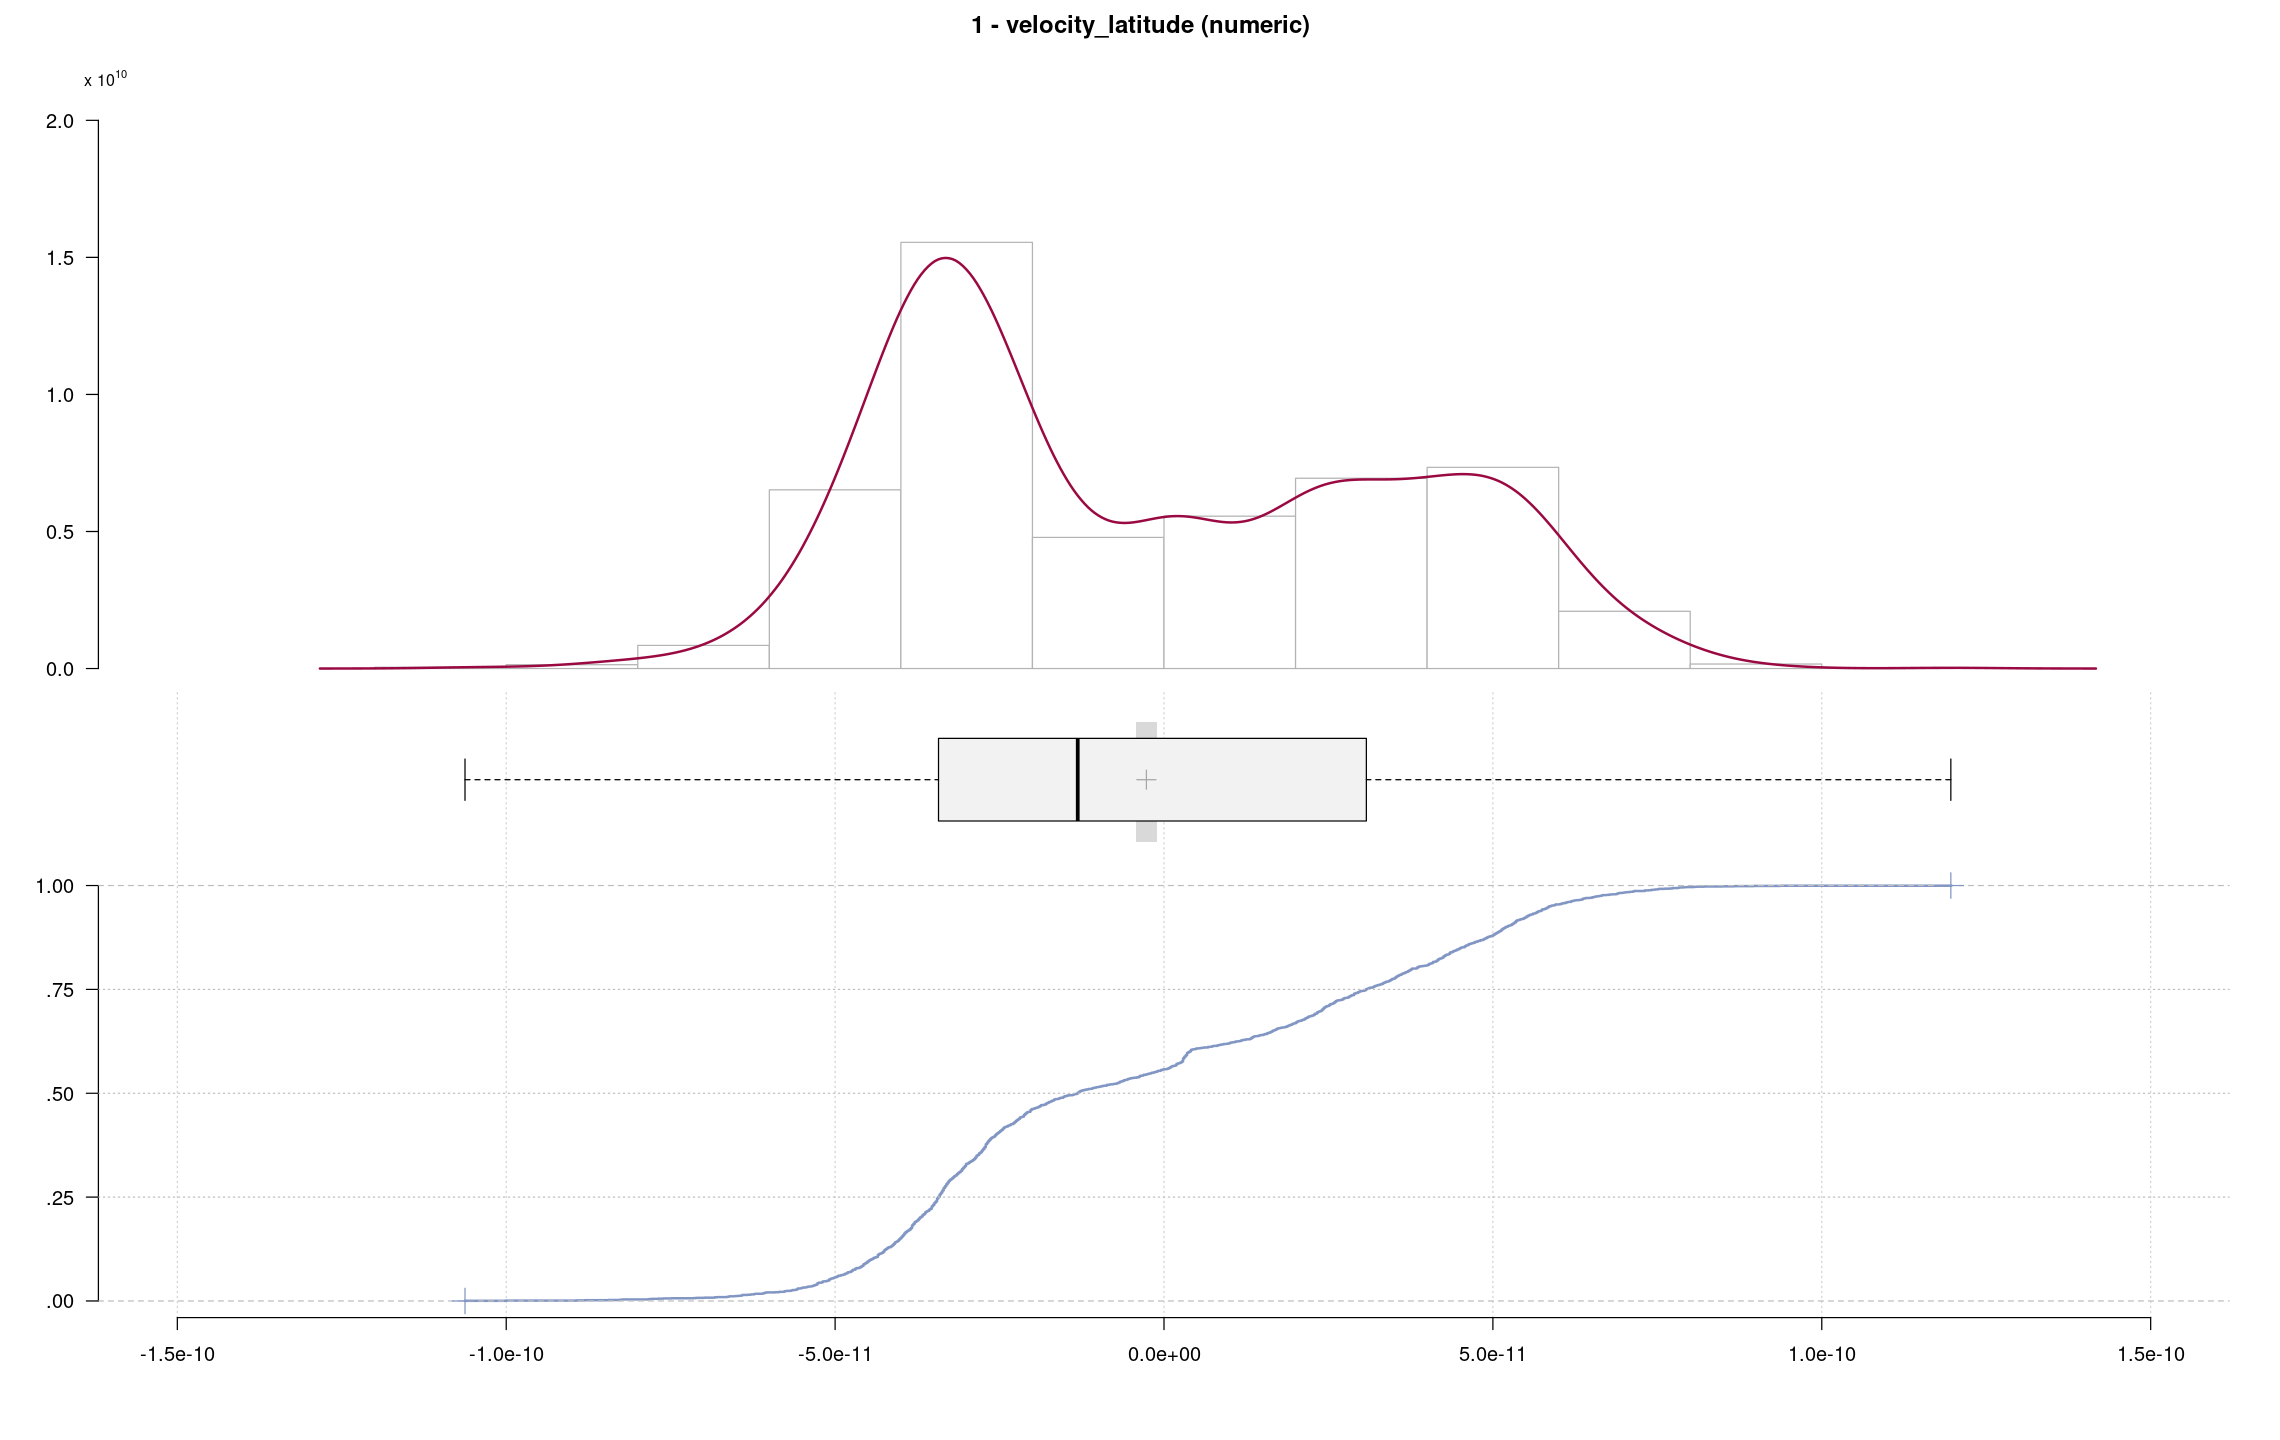

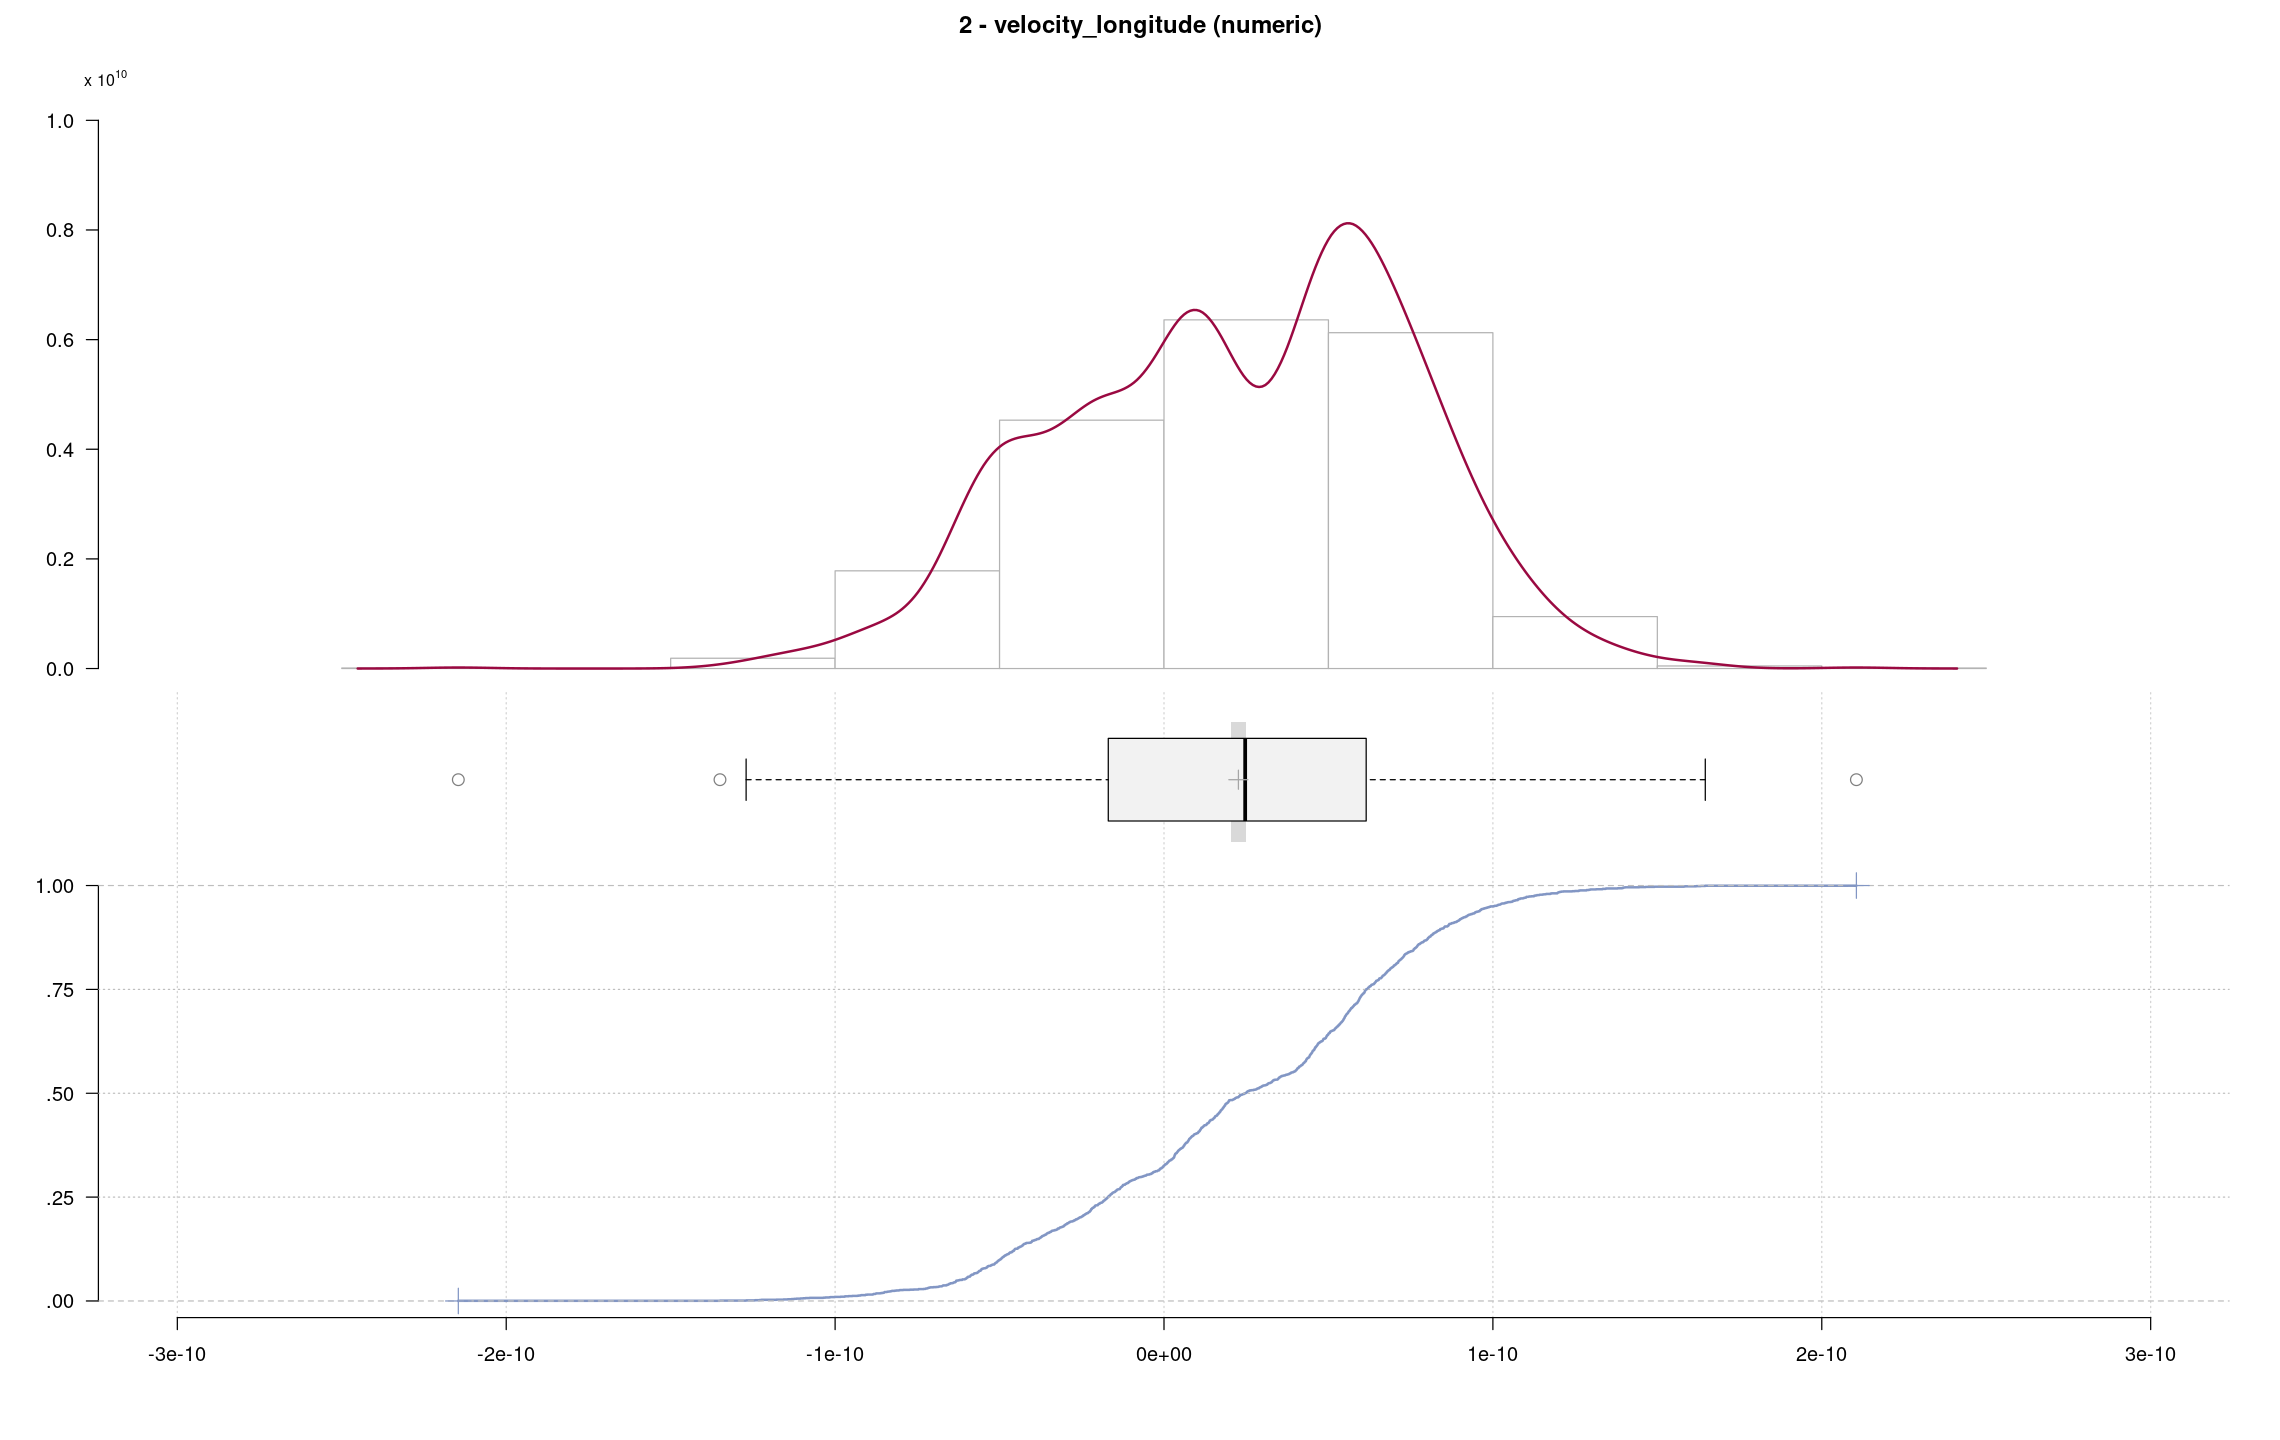

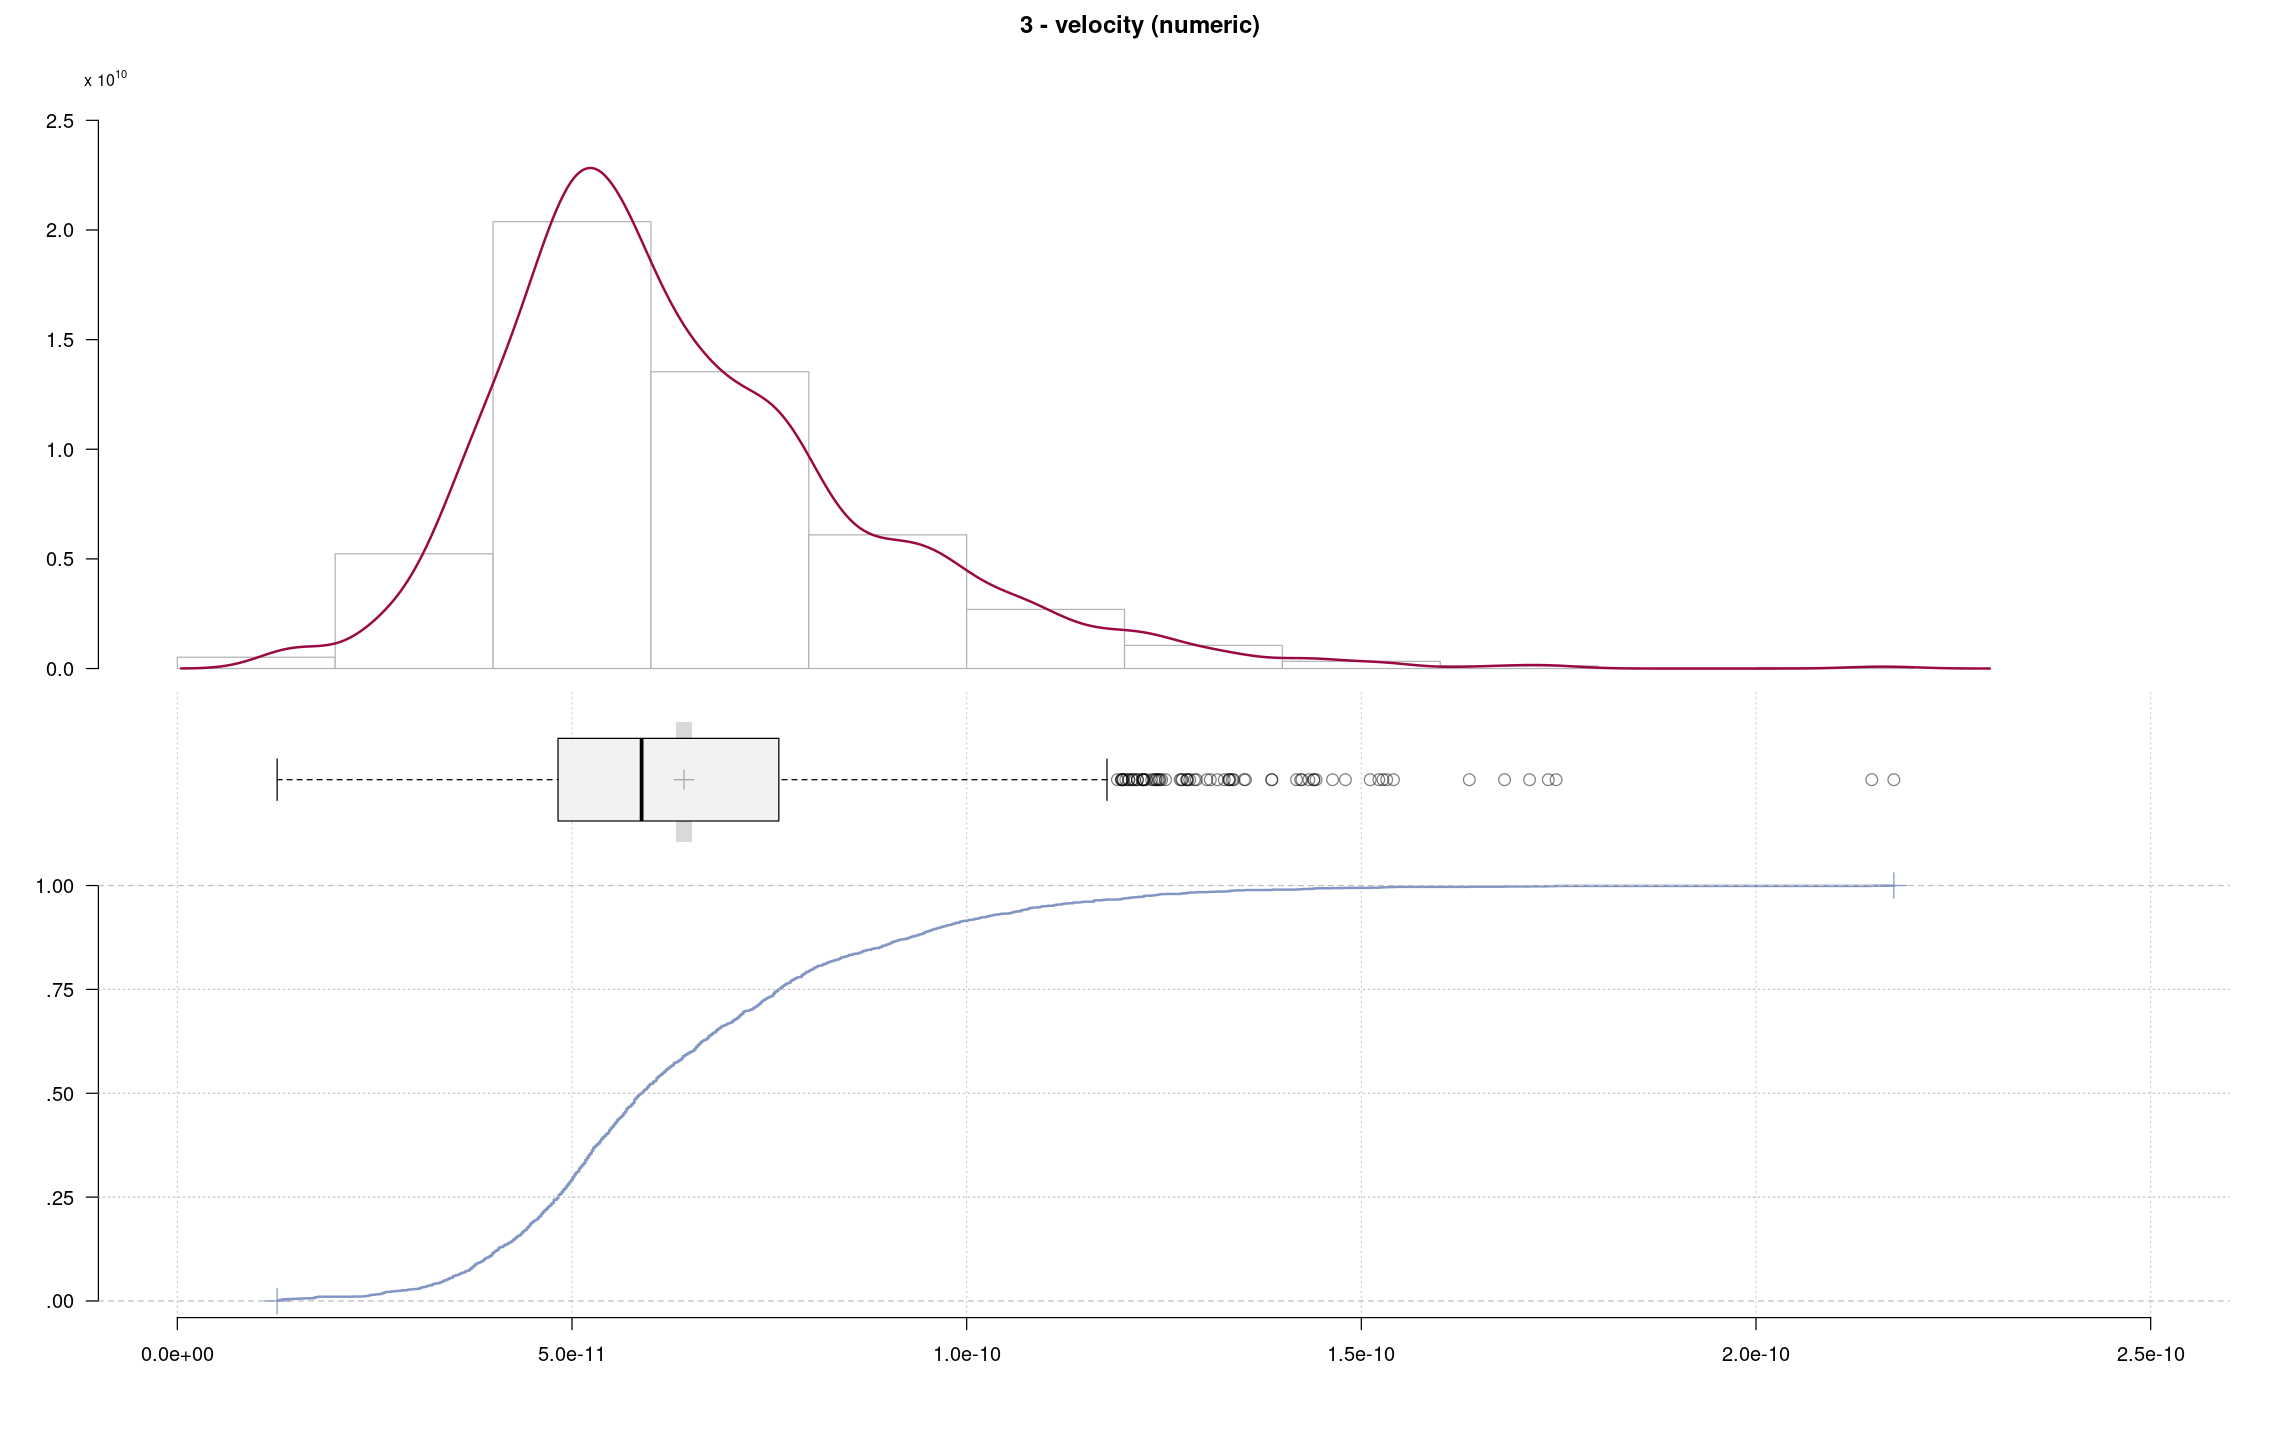

------------------------------------------------------------------------------ 
Describe covariates_outliers (data.frame):

data frame:	2133 obs. of  5 variables
		2132 complete cases (100.0%)

  Nr  ColName             Class    NAs       Levels
  1   velocity_latitude   numeric  1 (0.0%)        
  2   velocity_longitude  numeric  1 (0.0%)        
  3   velocity            numeric  1 (0.0%)        
  4   area                numeric  .               
  5   object              integer  .               


------------------------------------------------------------------------------ 
1 - velocity_latitude (numeric)

             length                  n                NAs             unique'
              2'133              2'132                  1                = n
                                100.0%               0.0%                   
                                                                            
                .05                .10                .25             

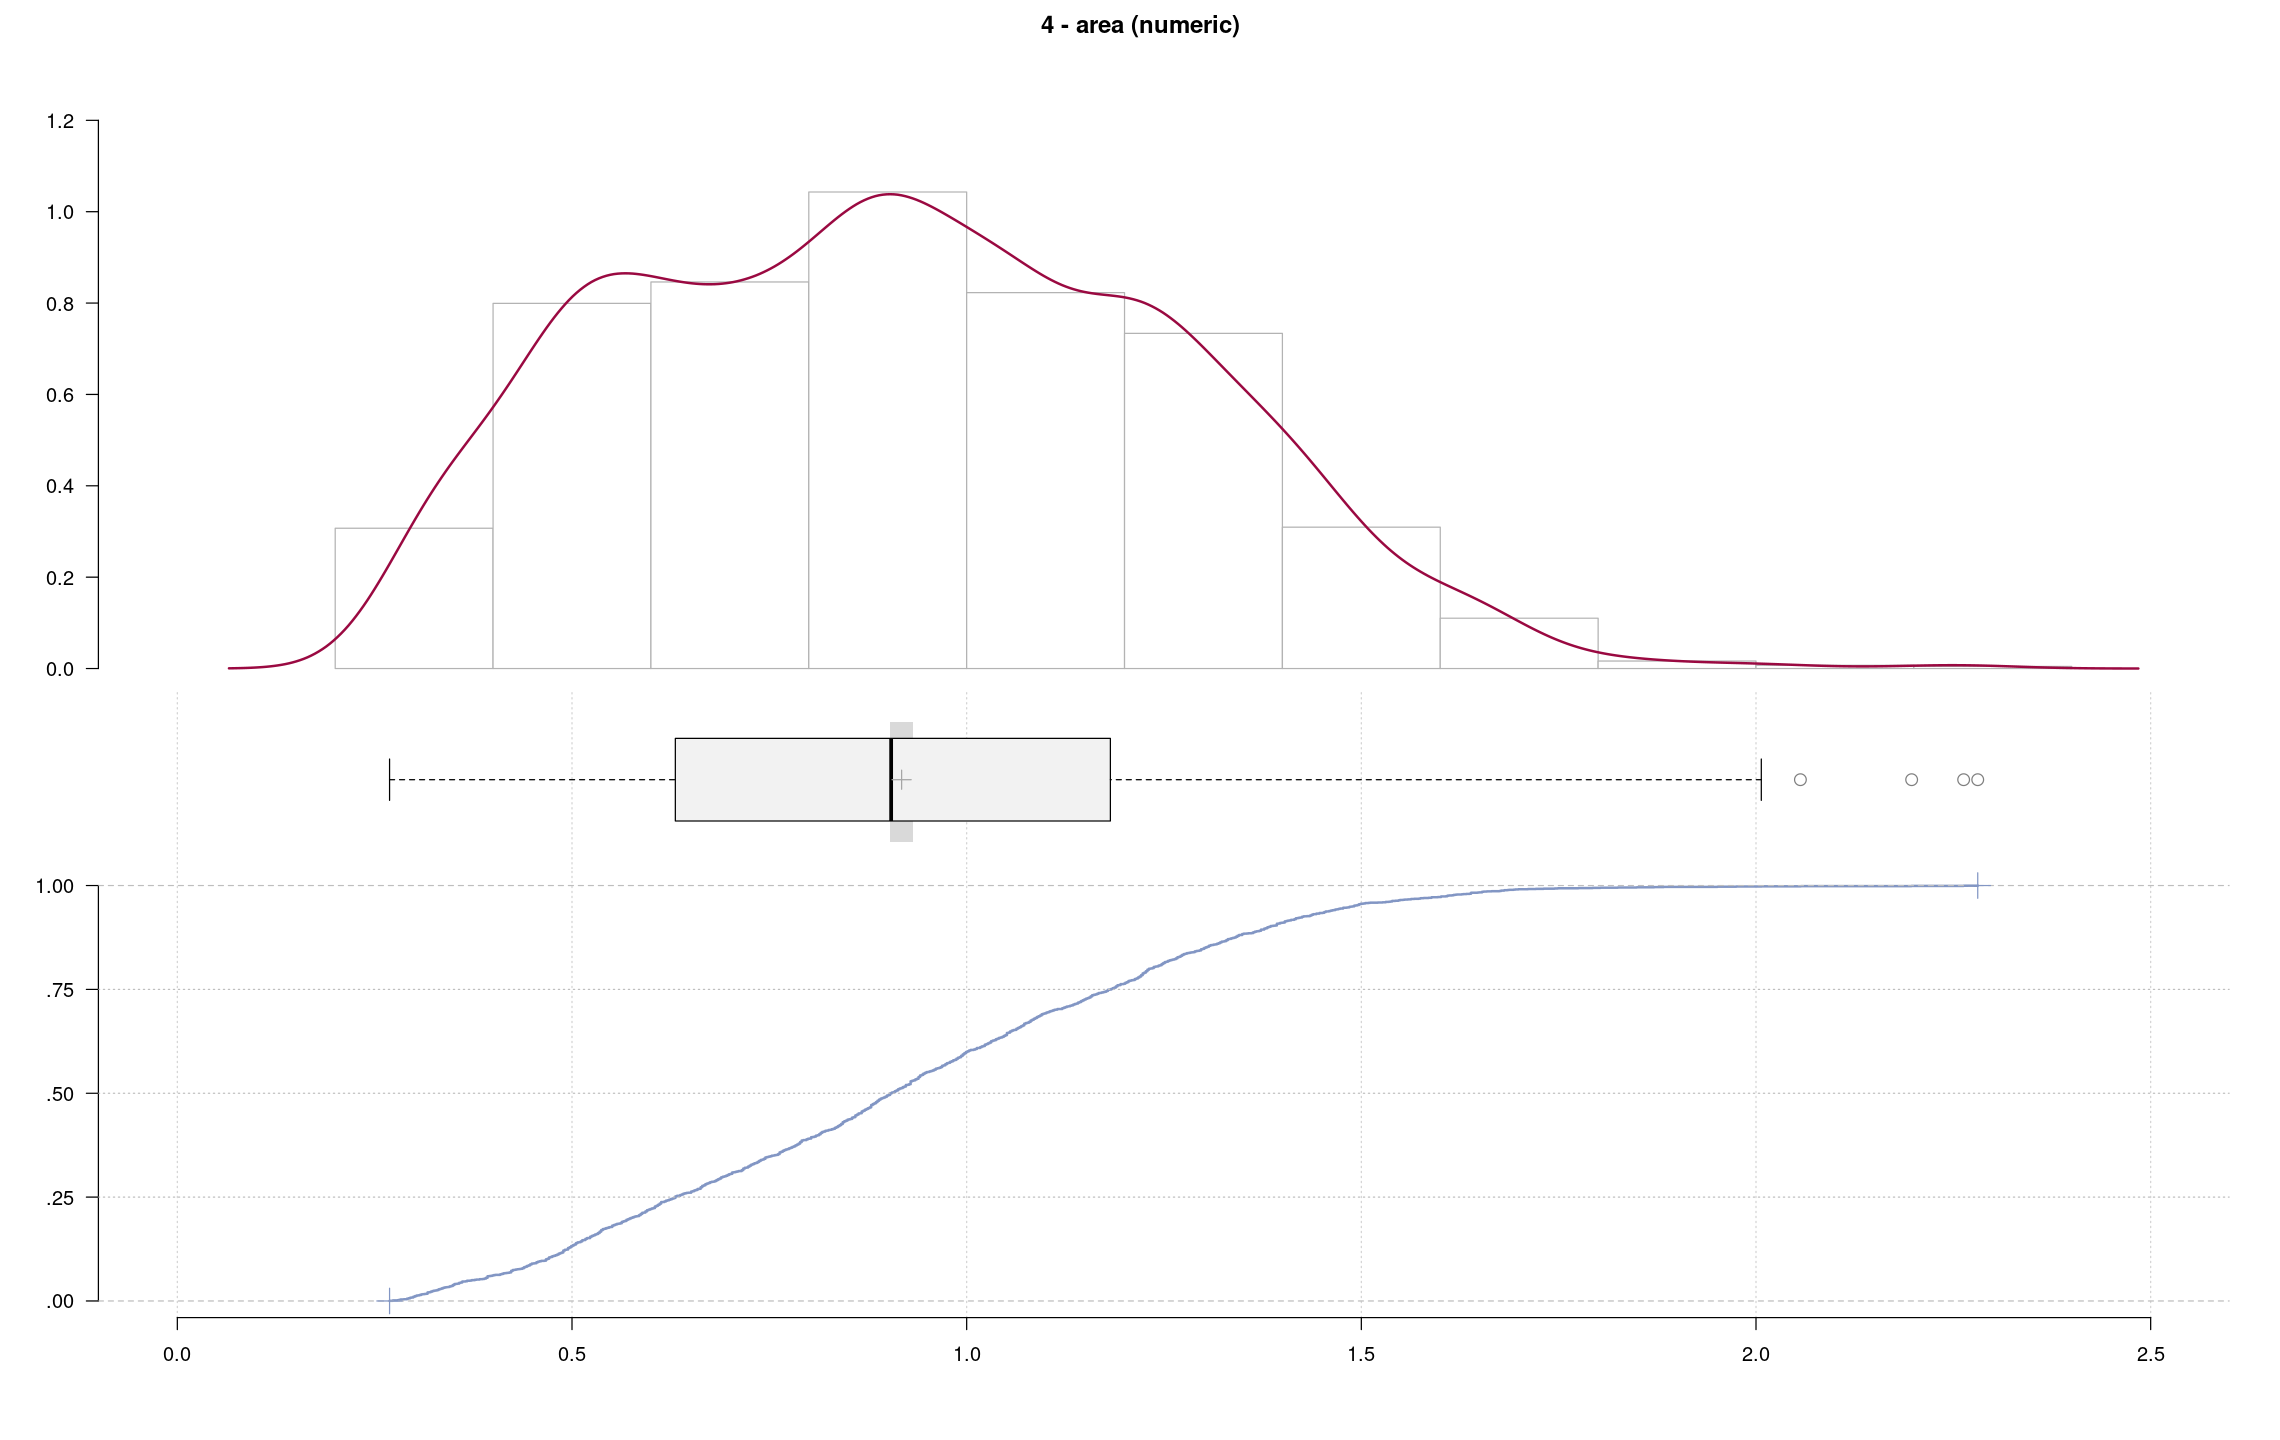

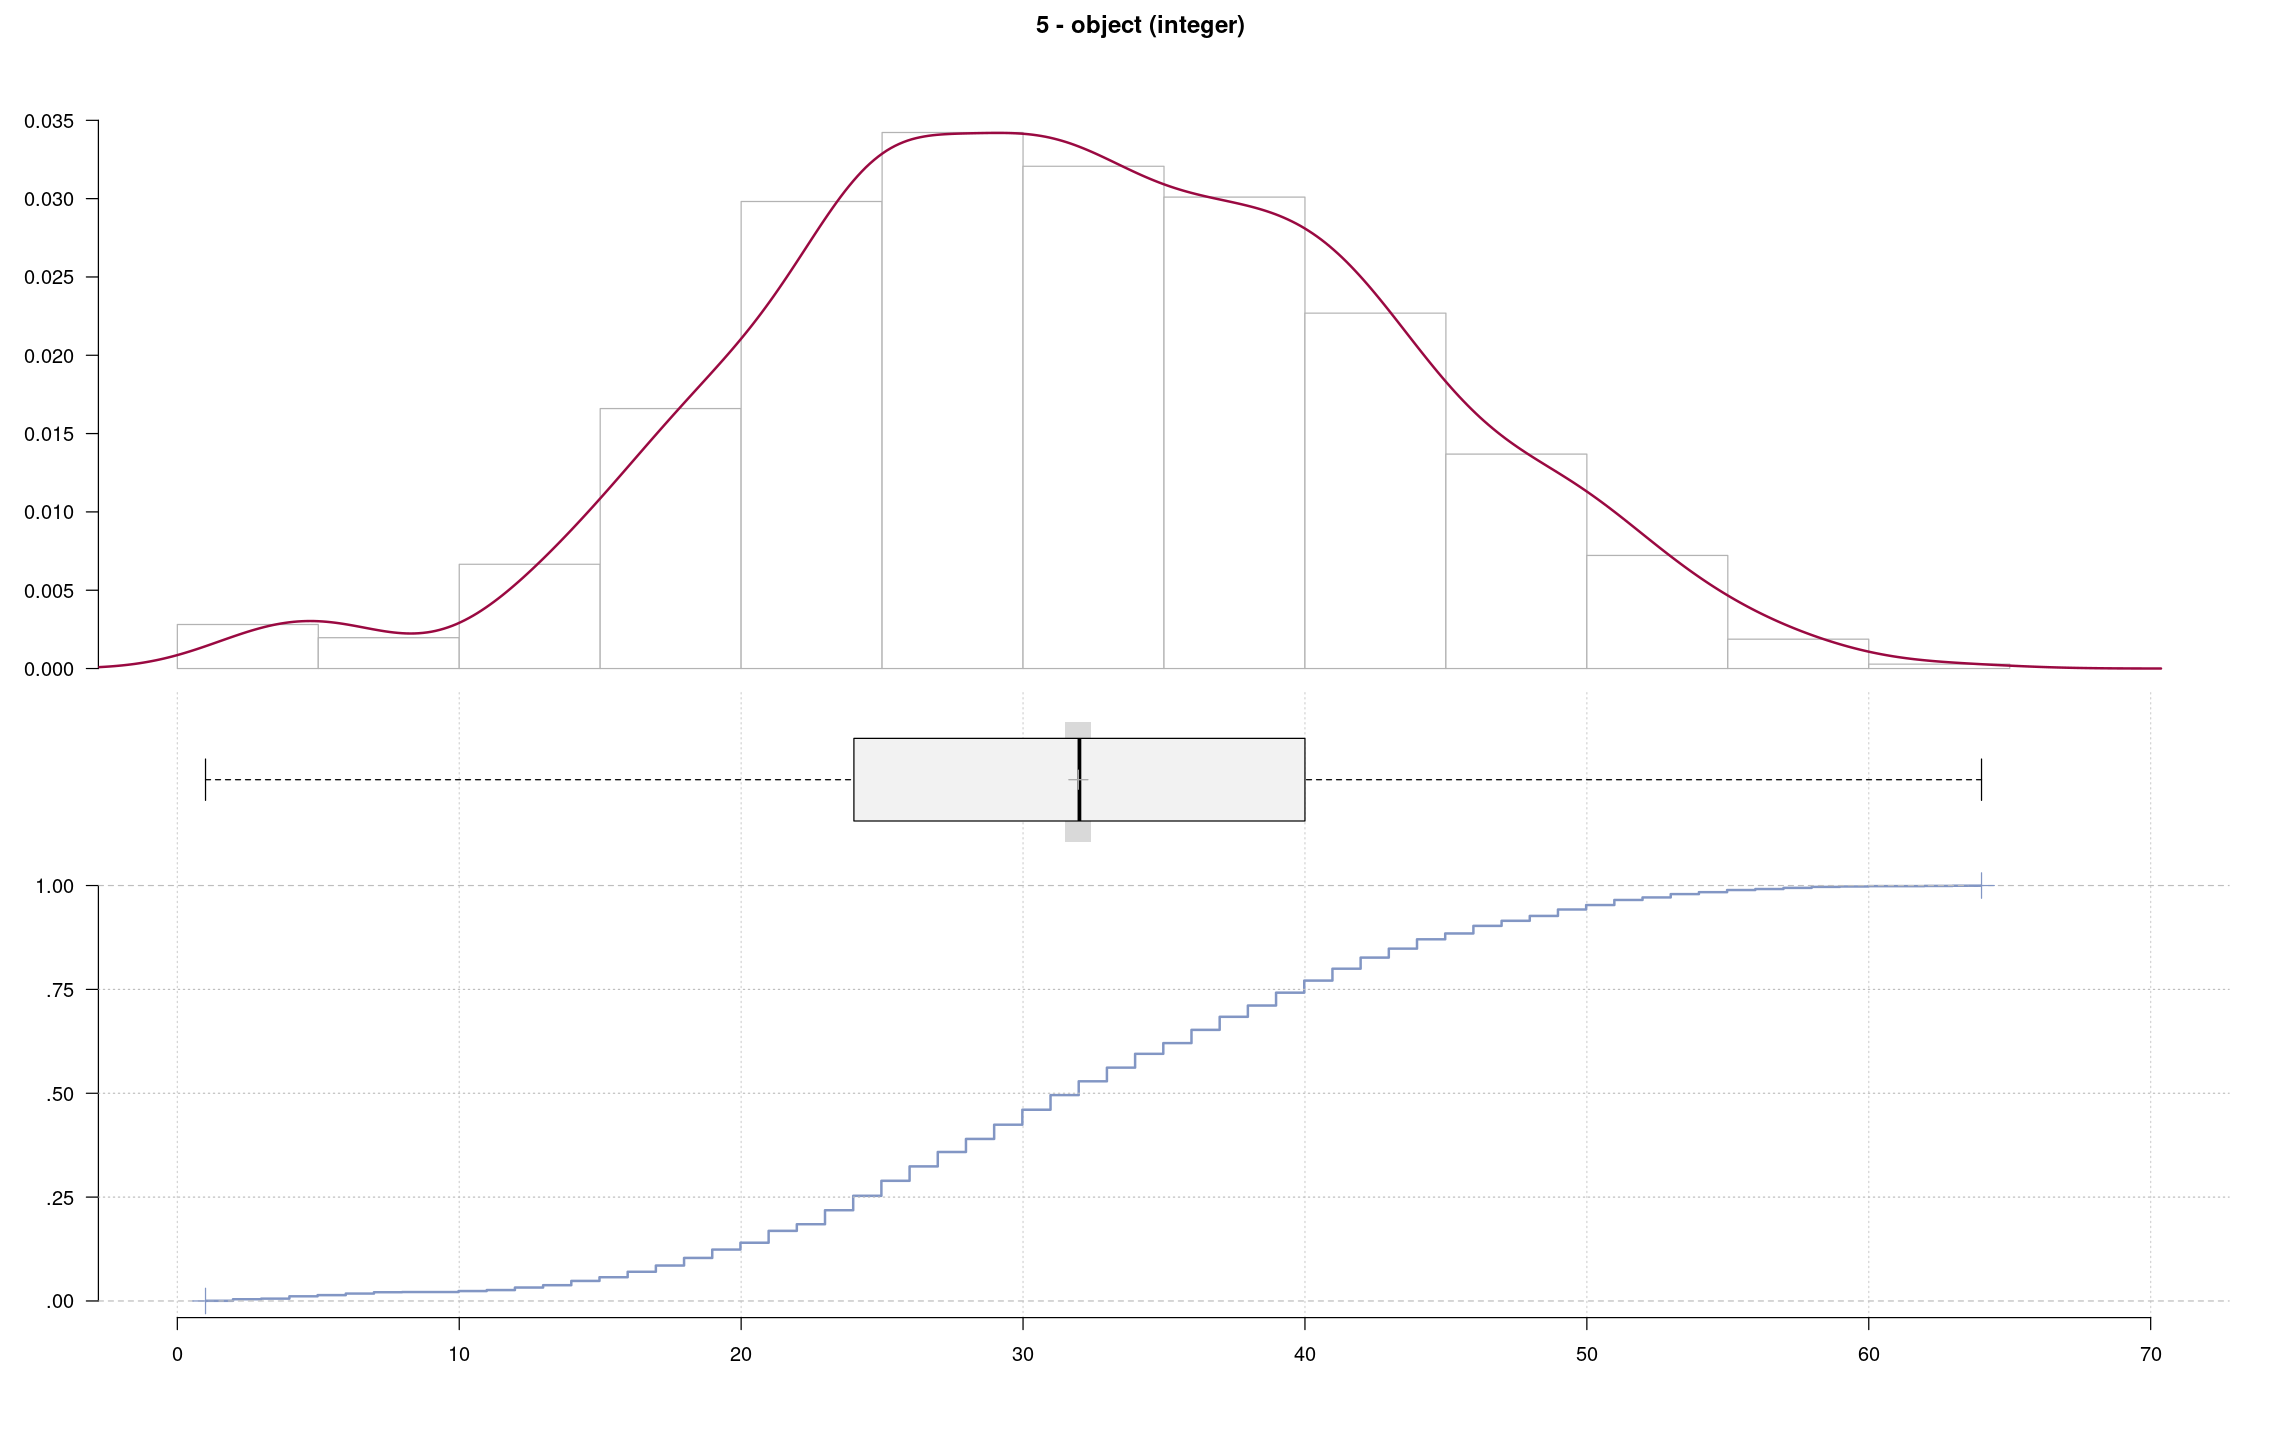

In [212]:
Desc(covariates_outliers)